<a href="https://colab.research.google.com/github/bartoszkozakiewicz/DeepLearning/blob/main/Bitcoin_prediction_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-01 15:25:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-04-01 15:25:13 (7.62 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



#Data
-Historical data of bitcoin price

#Import data to csv

In [3]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info(),len(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


(None, 2787)

- **Seasonality** - number of samples collected per year. So for Bitcoin it is 365 samples per years (1 per day)
- **Types  of times series patterns** :
  * Trend (np. linear)
  * Seasonal - np latem mniej energii, zimą więcej
  * Cyclic - ze co 5 lat jakiś patter się zatacza
  * With no patterns
-Univariate - One variable Bitcoin to predict bitcoin
-Multivariate - pogoda,godzina itd - ile energii z fotowoltaiki(kilka źródeł na przewidywanie)

In [5]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price 2013-2021')

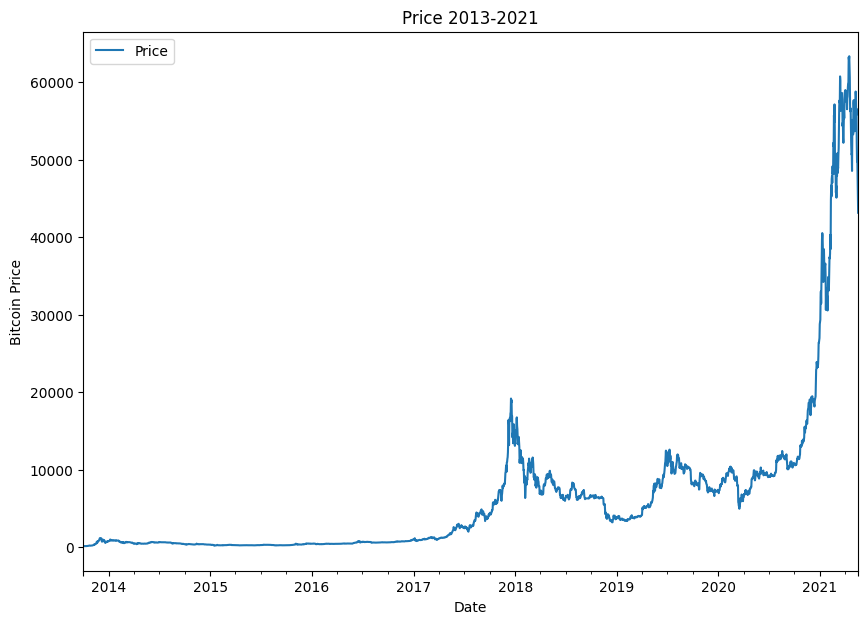

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("Bitcoin Price")
plt.title("Price 2013-2021")

#Import using python - csv

In [7]:
import csv
from datetime import datetime
timesteps = []

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f,delimiter = ",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))
timesteps[:5],btc_price[:5]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0)],
 [123.65499, 125.455, 108.58483, 118.67466, 121.33866])

Text(0.5, 1.0, 'Price 2013-2021')

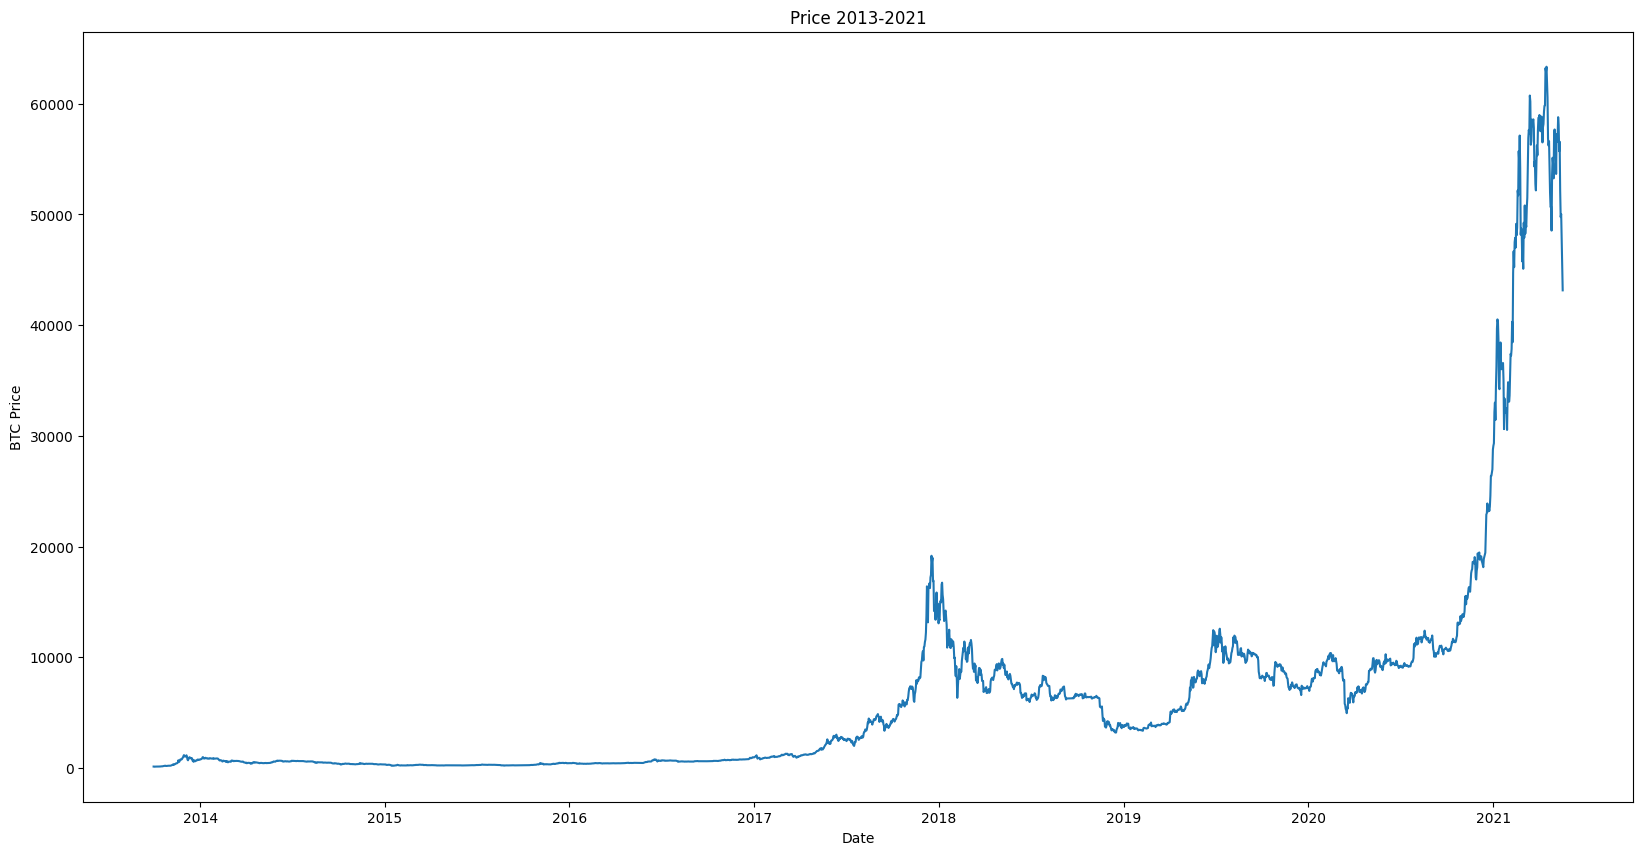

In [8]:
#Plot 
plt.figure(figsize=(20,10))
plt.plot(timesteps,btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price 2013-2021")

#Create train and test sets 
- Wrong way

In [9]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [10]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:5],prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [11]:
#Wrong way to train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(timesteps,prices,test_size=0.2,random_state=42)#Splits data randomly
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

Text(0, 0.5, 'BTC Price')

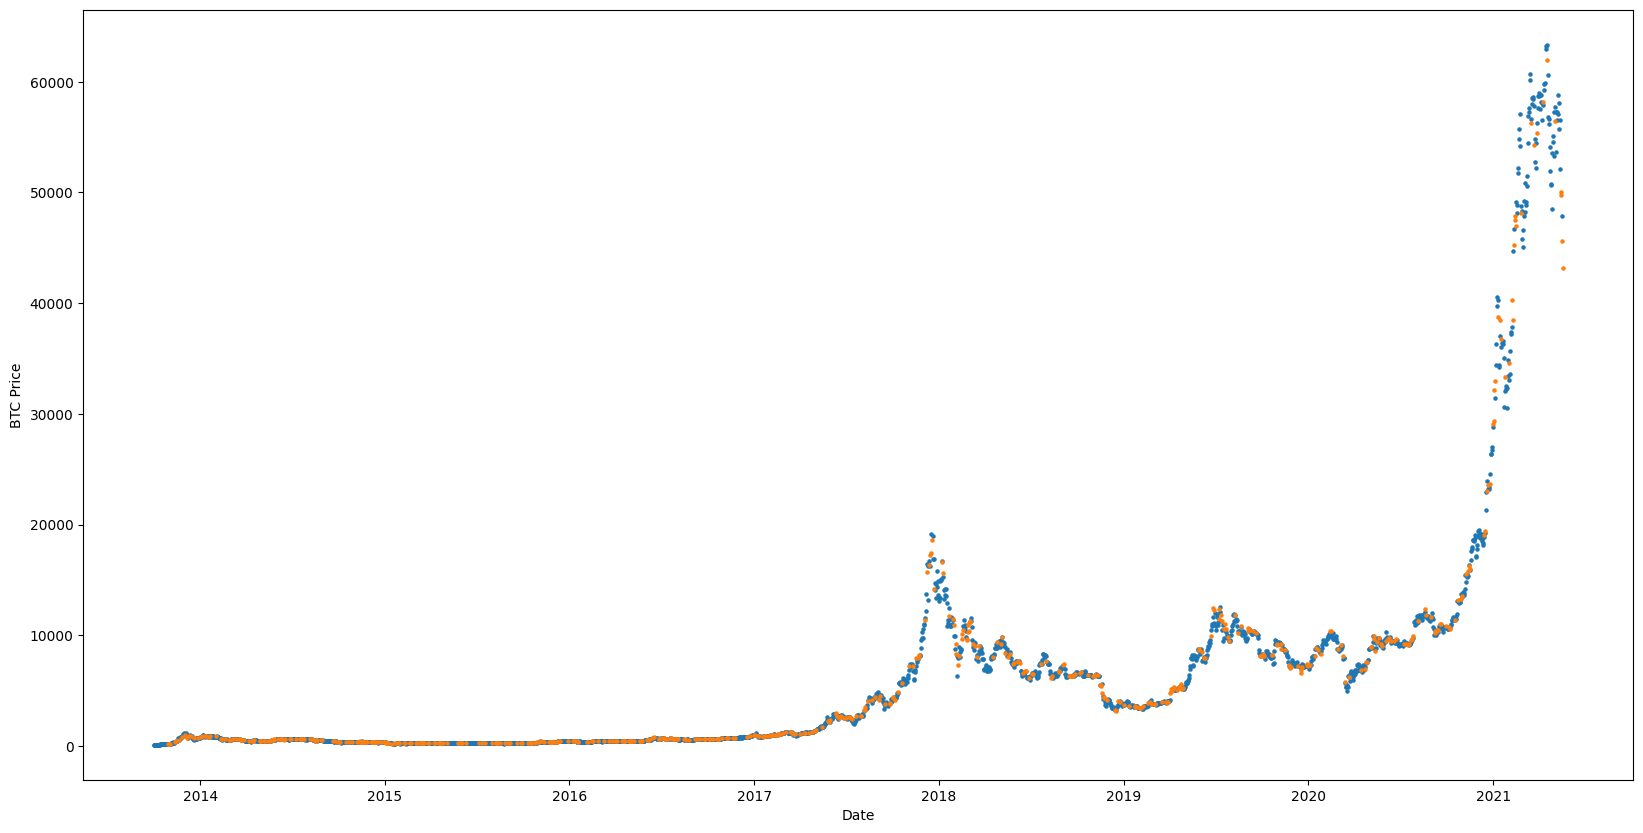

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

In [13]:
#Now in the rifght way
train_size = int(0.8*len(prices))
X_train,y_train = timesteps[:train_size],prices[:train_size]
X_test,y_test = timesteps[train_size:],prices[train_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

Text(0, 0.5, 'BTC Price')

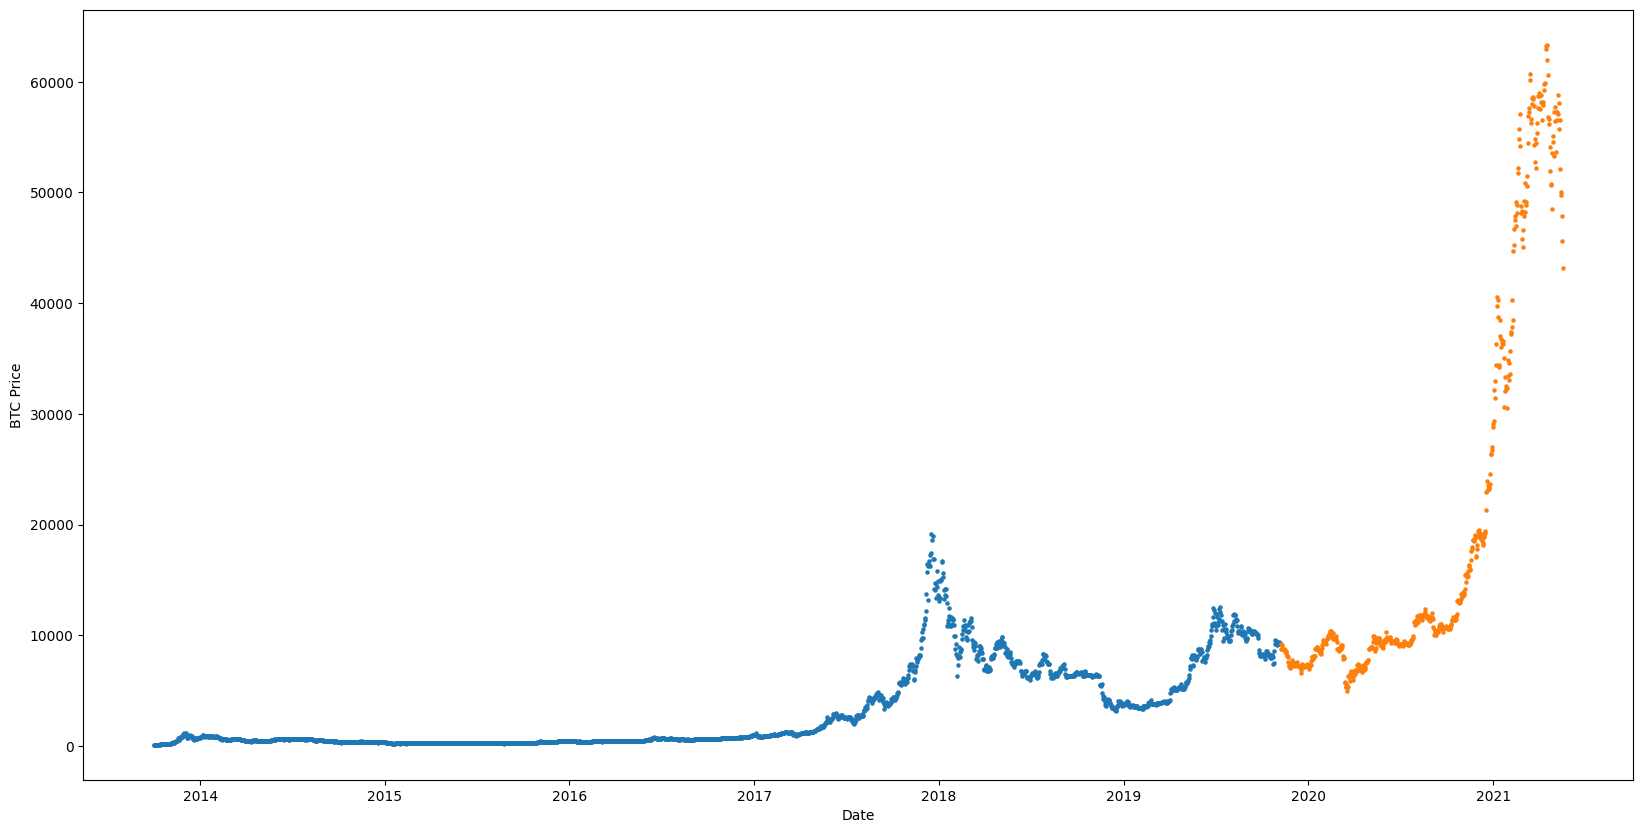

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

In [15]:
def plot_ts(timesteps,data,start=0,end=None,format=".",labels=None):
  plt.plot(timesteps[start:end],data[start:end],format,label=labels)
  plt.xlabel="Timesteps"
  plt.ylabel="BTC_Price"
  plt.grid(True)
  if labels:
    plt.legend()

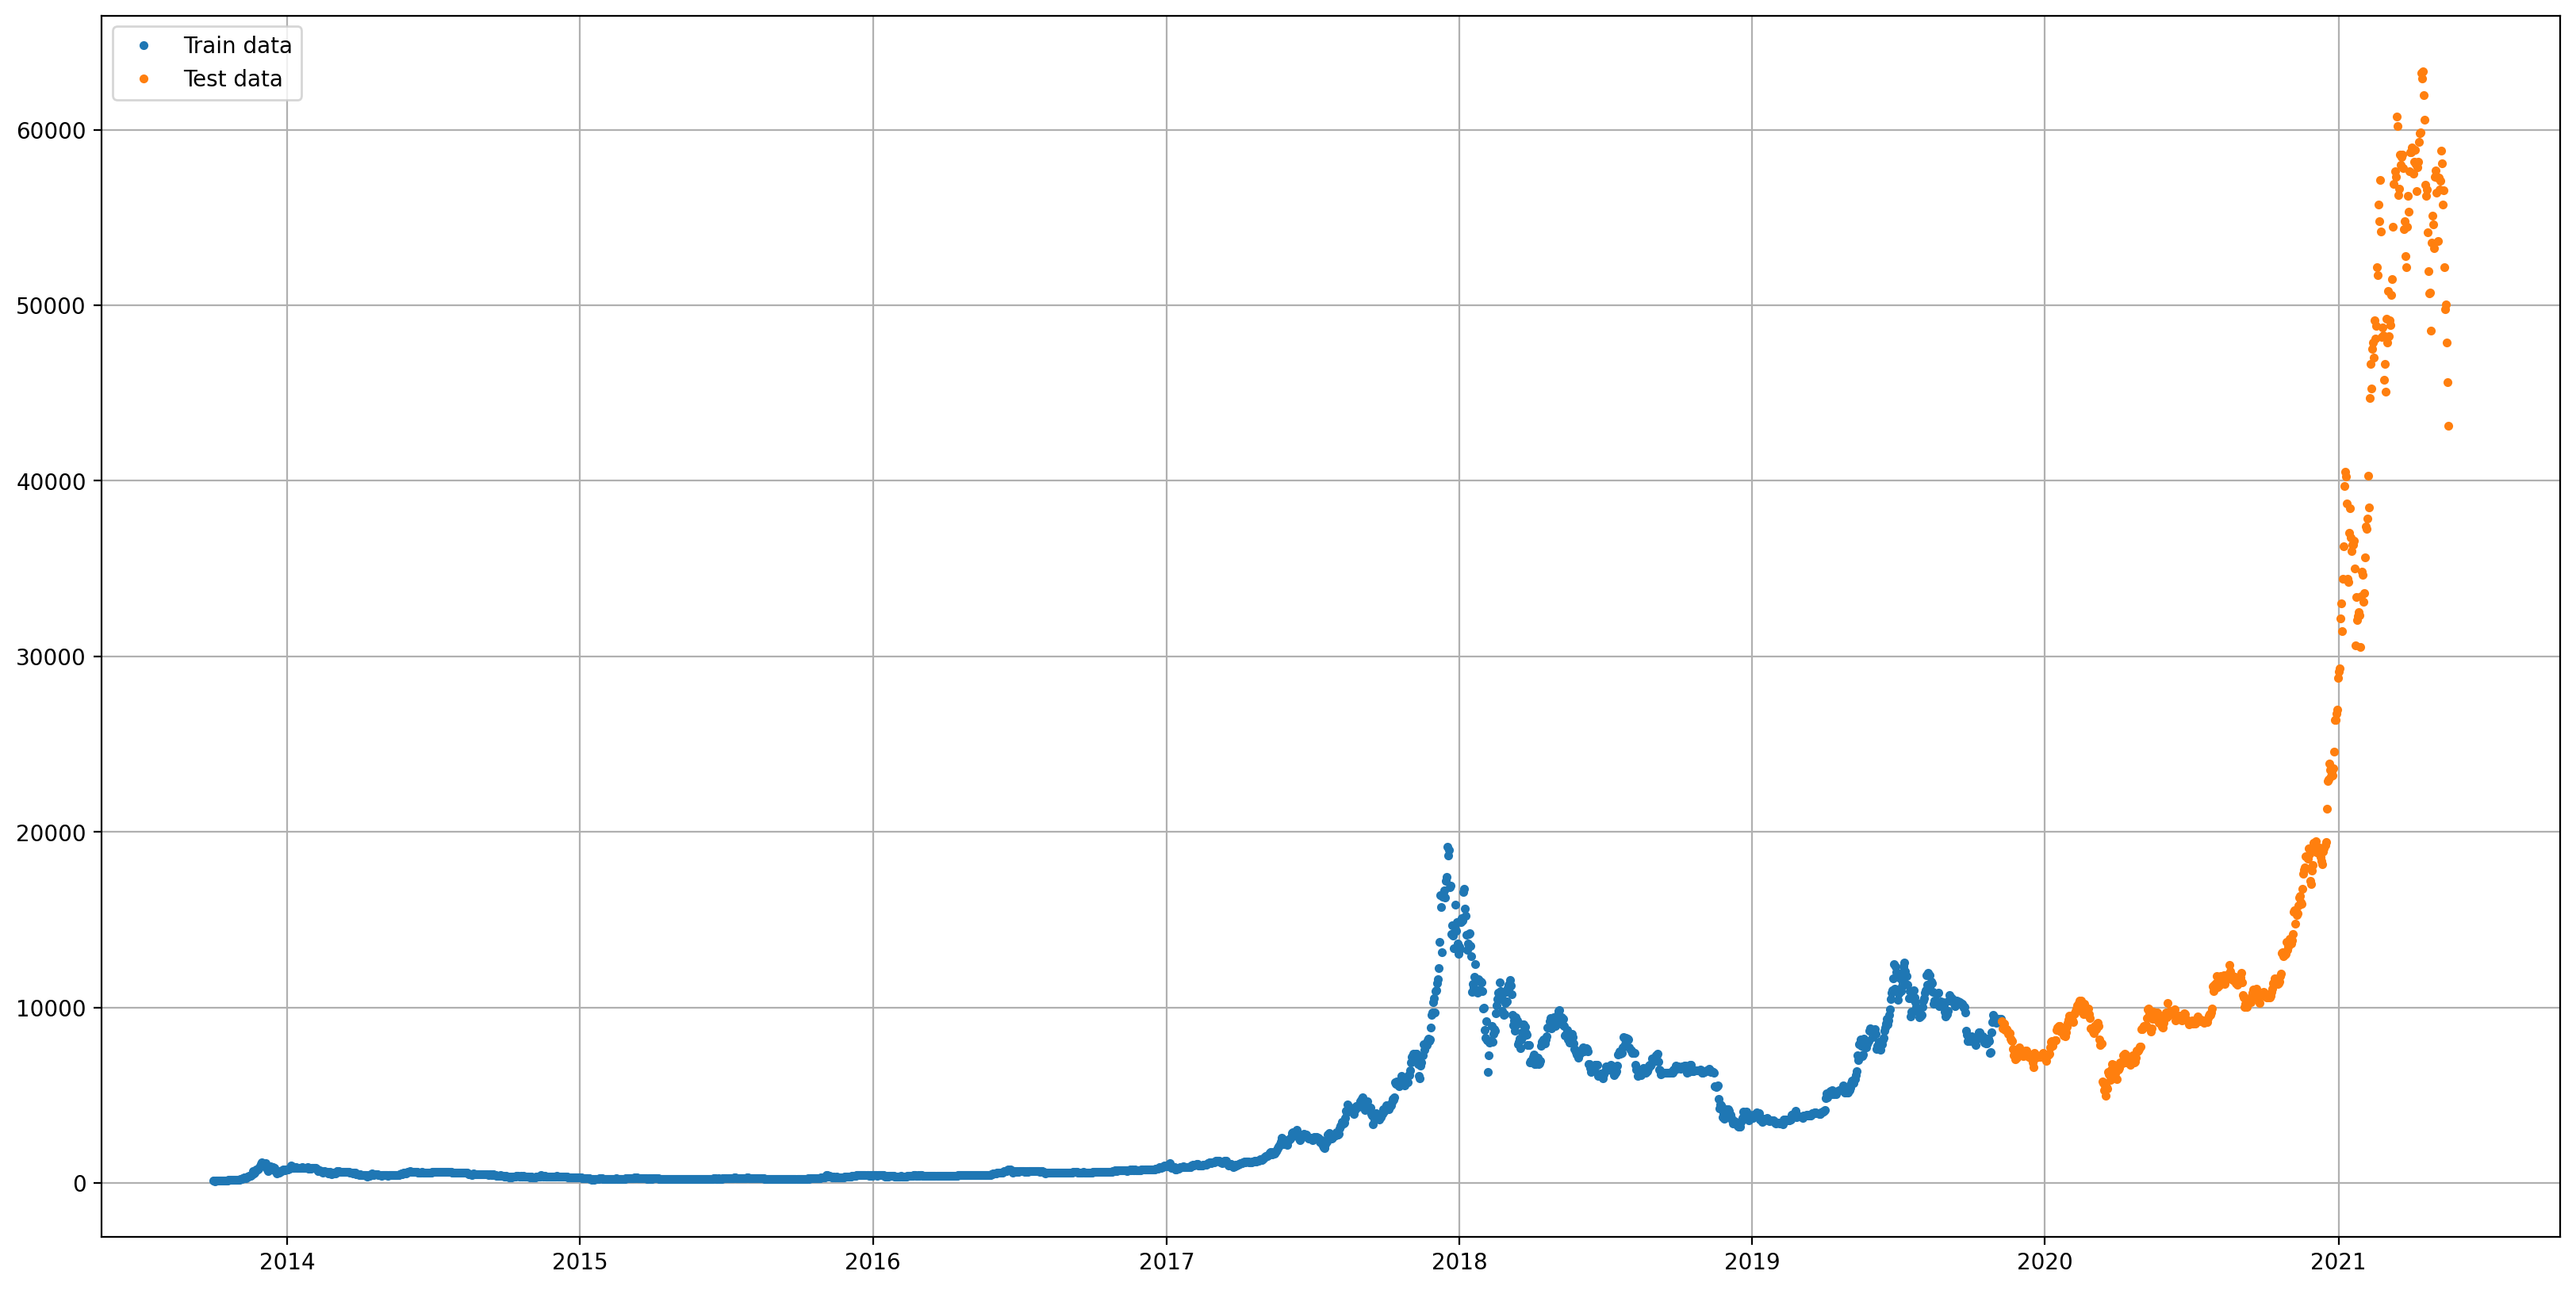

In [16]:
plt.figure(figsize=(20,10),dpi=200)
plot_ts(timesteps=X_train,data=y_train,labels="Train data")
plot_ts(timesteps=X_test,data=y_test,labels="Test data")

## Modeling Experiments

1. Naive model (baseline)
2. Dense model, horizon =1 window=7
3. Same as model_1 but with another window = 30, horizon = 1
4. Same as model_1 but with another window = 30, horizon = 7
5. Conv1D
6. LSTM
7. Same as model 1 (but with multivariate data)
8. N-BEATS algorithm
9. Ensemble (multiple models stacked together)
10. Future prediction model
11. Same as model_1 but with turkey data introduced 

##Naive Model
- y(t) = y(t-1)
- autoregression

In [17]:
naive_forecast = y_test[:-1]
naive_forecast[:10] , y_test[:10]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]))

In [18]:
naive_forecast[-10:], y_test[-10:]

(array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

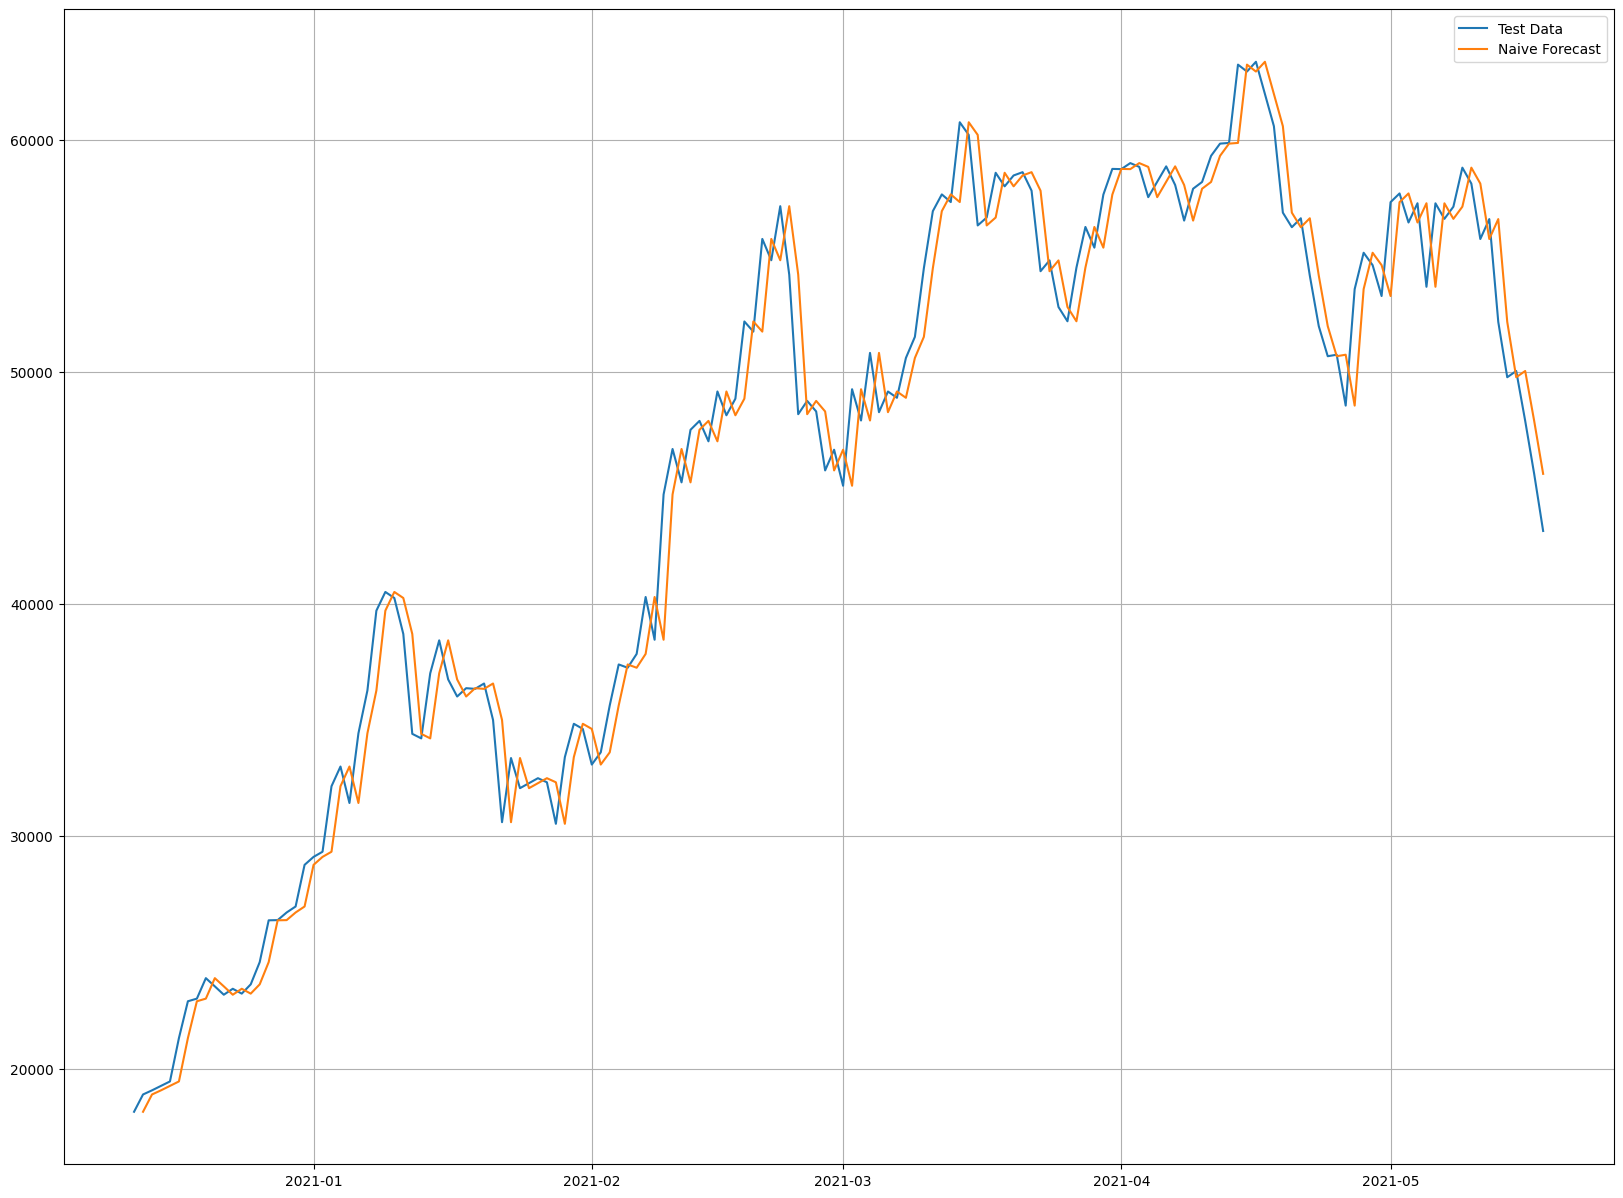

In [19]:
plt.figure(figsize=(20,15))
#plot_ts(X_train,y_train,labels="Train Data")
plot_ts(X_test,y_test,start=400,format='-',labels="Test Data")
plot_ts(X_test[1:], naive_forecast,start=400,format='-', labels="Naive Forecast")

##Time series evaluation metrics
- MAE / MSE / RMSE / Huber
- MAPE = Mean absolute precentage error
- MASE = Mean absolute scaled error

In [20]:
def mase(y_true,y_pred):
  """
  For non seasonality
  """
  import tensorflow as tf
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  #mae of naive forecast
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae/mae_naive


In [21]:
mase(y_true=y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [22]:
def error_dict(y_true,y_pred):
  """
  Collect MAE, MASE, RMSE, MSE, MAPE to dictionary
  """
  errors = {}
  import tensorflow as tf
  import numpy as np
  errors["MAE"] = tf.reduce_mean(tf.abs(y_true-y_pred)).numpy()
  errors["MSE"] = tf.reduce_mean((y_true-y_pred)**2).numpy()
  errors["RMSE"] = np.sqrt(tf.reduce_mean((y_true-y_pred)**2))
  errors["MASE"] = mase(y_true,y_pred).numpy()
  errors["MAPE"] = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred).numpy()
  if errors["MAPE"].ndim > 0:
    errors["MAE"]  = tf.reduce_mean(errors["MAE"]).numpy()
    errors["MSE"] = tf.reduce_mean(errors["MSE"]).numpy()
    errors["RMSE"] = tf.reduce_mean(errors["RMSE"]).numpy()
    errors["MASE"] = tf.reduce_mean(errors["MASE"]).numpy()
    errors["MAPE"] = tf.reduce_mean(errors["MAPE"]).numpy()
  return errors

In [23]:
naive_results = error_dict(y_true=y_test[1:], y_pred = naive_forecast)
naive_results

{'MAE': 567.9802273457541,
 'MSE': 1147547.1250238959,
 'RMSE': 1071.2362601330744,
 'MASE': 0.9995699939182624,
 'MAPE': 2.516524929982267}

##Make windows for deep learning models - make it supervised
[0,1,2,3,4,5,6] -> 7

[1,2,3,4,5,6,7] -> 8

In [24]:
HORIZON = 1
WINDOW_SIZE = 7
import tensorflow as tf
def get_labelled_window(data,horizon=HORIZON):
  """
  Getting np. Input [1,2,3,4,5,6,7] -> Output ([1,2,3,4,5,6], [7])
  """
  return data[:,:-horizon], data[:,-horizon:]

In [25]:
window, labels = get_labelled_window(tf.expand_dims(tf.range(8),axis=0))
tf.squeeze(window),tf.squeeze(labels)

(<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=7>)

## Dwie opcje:
- Sliding window - Tutaj zostanie użyte
- Expanding window 

## Making windows manually

In [26]:
#Make preprocessing function
#Ręczne tworzenie okien - Aczkolwiek jest gotowa funkcja - tf.keras.preprocessing.timeseries_dataset_from_array
"""
1. Window of window size
2. Window indexes
3. Data to made in 2 window indexes
4. Make windows with their labels
"""
def get_windows(data,window_size = WINDOW_SIZE,horizon=HORIZON):
  #1.
  window_steps = np.expand_dims(np.arange(window_size+horizon),axis=0)
  #2.
  window_indexes = window_steps + np.expand_dims(np.arange(len(data)-window_size-horizon+1),axis=0).T
  #3.
  window_values = data[window_indexes]
  #4.
  windows,labels = get_labelled_window(window_values,horizon=horizon)
  return windows,labels

In [27]:
import numpy as np
np.expand_dims(np.arange(8), axis=0) + np.expand_dims(np.arange(20-7-1+1),axis=0).T


array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [11, 12, 13, 14, 15, 16, 17, 18],
       [12, 13, 14, 15, 16, 17, 18, 19]])

In [28]:
windows, labels = get_windows(prices)

In [29]:
#First
for i in range(5):
  print(f"Input {windows[i]}  -> Output {labels[i]}")

Input [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]  -> Output [123.033]
Input [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]  -> Output [124.049]
Input [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]  -> Output [125.96116]
Input [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116]  -> Output [125.27966]
Input [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966]  -> Output [125.9275]


In [30]:
#Last
for i in range(5):
  print(f"Input {windows[i-5]}  -> Output {labels[i-5]}")

Input [56583.84987917 57107.12067189 58788.20967893 58102.19142623
 55715.54665129 56573.5554719  52147.82118698]  -> Output [49764.1320816]
Input [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816 ]  -> Output [50032.69313676]
Input [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]  -> Output [47885.62525472]
Input [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]  -> Output [45604.61575361]
Input [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]  -> Output [43144.47129086]


## Making windows with built in function
- tf.keras.preprocessing.timeseries_dataset_from_array

In [31]:
tf.keras.preprocessing.timeseries_dataset_from_array(data=prices[:-1],targets=prices[1:],sequence_length=8,sequence_stride=1)

<_BatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Make train/test split

In [32]:
def train_test_split(windows,labels,test_split):
  split = int(len(windows) * (1-test_split))
  train_windows = windows[:split]
  train_labels = labels[:split]
  test_windows = windows[split:]
  test_labels = labels[split:]
  return train_windows, train_labels,test_windows, test_labels

In [33]:
train_windows, train_labels,test_windows, test_labels = train_test_split(windows=windows,labels=labels,test_split=0.2)

In [34]:
len(train_windows), len(train_labels), len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

In [35]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ]])

In [36]:
train_labels[:3]

array([[123.033  ],
       [124.049  ],
       [125.96116]])

##Model checkpoints - Callbacks

In [37]:
import os
def checkpoint(model_name,path = "experiments"):
  model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(path,model_name),
                                                        verbose=1,
                                                        save_best_only=True)
  return model_checkpoint

##Model 2: Dense model

In [38]:
import tensorflow as tf
from tensorflow.keras import layers
model2 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model2")

#Compile
model2.compile(loss="mse",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])
#Fit
model2.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[checkpoint(model2.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 28585996.0000 - mae: 3340.2896 - mse: 28585996.0000  
Epoch 1: val_loss improved from inf to 210969056.00000, saving model to experiments/model2


18/18 [==============================] - 6s 50ms/step - loss: 28585996.0000 - mae: 3340.2896 - mse: 28585996.0000 - val_loss: 210969056.0000 - val_mae: 10915.6797 - val_mse: 210969056.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 2046673.0000 - mae: 744.5660 - mse: 2046673.0000 
Epoch 2: val_loss improved from 210969056.00000 to 7294306.00000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 2046673.0000 - mae: 744.5660 - mse: 2046673.0000 - val_loss: 7294306.0000 - val_mae: 1568.5151 - val_mse: 7294306.0000
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 526638.0000 - mae: 378.1389 - mse: 526638.0000
Epoch 3: val_loss improved from 7294306.00000 to 7121892.50000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 520272.9688 - mae: 375.7514 - mse: 520272.9688 - val_loss: 7121892.5000 - val_mae: 1546.5294 - val_mse: 7121892.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 387525.1875 - mae: 310.9074 - mse: 387525.1875
Epoch 4: val_loss improved from 7121892.50000 to 4952918.50000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 234351.1406 - mae: 217.2024 - mse: 234351.1406 - val_loss: 4952918.5000 - val_mae: 1343.0634 - val_mse: 4952918.5000
Epoch 5/100
15/18 [========================>.....] - ETA: 0s - loss: 223324.6875 - mae: 216.7847 - mse: 223324.6875
Epoch 5: val_loss improved from 4952918.50000 to 4124635.25000, saving model to experiments/model2


18/18 [==============================] - 1s 33ms/step - loss: 219151.8750 - mae: 212.9144 - mse: 219151.8750 - val_loss: 4124635.2500 - val_mae: 1156.1664 - val_mse: 4124635.2500
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 197757.1250 - mae: 192.8287 - mse: 197757.1250
Epoch 6: val_loss improved from 4124635.25000 to 3915604.75000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 199494.3125 - mae: 194.0978 - mse: 199494.3125 - val_loss: 3915604.7500 - val_mae: 1096.3159 - val_mse: 3915604.7500
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 197798.0000 - mae: 193.2627 - mse: 197798.0000
Epoch 7: val_loss did not improve from 3915604.75000
18/18 [==============================] - 0s 5ms/step - loss: 197822.7969 - mae: 193.4119 - mse: 197822.7969 - val_loss: 3921916.7500 - val_mae: 1108.9073 - val_mse: 3921916.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 172374.9688 - mae: 165.7468 - mse: 172374.9688
Epoch 8: val_loss improved from 3915604.75000 to 3857351.25000, saving model to experiments/model2


18/18 [==============================] - 1s 33ms/step - loss: 195272.6875 - mae: 192.0004 - mse: 195272.6875 - val_loss: 3857351.2500 - val_mae: 1095.2933 - val_mse: 3857351.2500
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 195266.4375 - mae: 190.8879 - mse: 195266.4375
Epoch 9: val_loss improved from 3857351.25000 to 3840248.00000, saving model to experiments/model2


18/18 [==============================] - 1s 46ms/step - loss: 193358.7656 - mae: 190.8455 - mse: 193358.7656 - val_loss: 3840248.0000 - val_mae: 1098.9065 - val_mse: 3840248.0000
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 185549.9062 - mae: 181.6162 - mse: 185549.9062
Epoch 10: val_loss improved from 3840248.00000 to 3758551.75000, saving model to experiments/model2


18/18 [==============================] - 1s 46ms/step - loss: 190829.4062 - mae: 189.8292 - mse: 190829.4062 - val_loss: 3758551.7500 - val_mae: 1081.0115 - val_mse: 3758551.7500
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 188335.2031 - mae: 188.3319 - mse: 188335.2031
Epoch 11: val_loss improved from 3758551.75000 to 3705830.25000, saving model to experiments/model2


18/18 [==============================] - 1s 46ms/step - loss: 188335.2031 - mae: 188.3319 - mse: 188335.2031 - val_loss: 3705830.2500 - val_mae: 1076.2092 - val_mse: 3705830.2500
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 80347.9141 - mae: 144.8260 - mse: 80347.9141
Epoch 12: val_loss improved from 3705830.25000 to 3636351.00000, saving model to experiments/model2


18/18 [==============================] - 1s 34ms/step - loss: 186669.2656 - mae: 187.9948 - mse: 186669.2656 - val_loss: 3636351.0000 - val_mae: 1064.4552 - val_mse: 3636351.0000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 201158.1406 - mae: 192.1285 - mse: 201158.1406
Epoch 13: val_loss improved from 3636351.00000 to 3596886.50000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 182531.5625 - mae: 185.2009 - mse: 182531.5625 - val_loss: 3596886.5000 - val_mae: 1065.1165 - val_mse: 3596886.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 126427.3281 - mae: 175.8732 - mse: 126427.3281
Epoch 14: val_loss improved from 3596886.50000 to 3487518.00000, saving model to experiments/model2


18/18 [==============================] - 1s 33ms/step - loss: 178268.8125 - mae: 182.1910 - mse: 178268.8125 - val_loss: 3487518.0000 - val_mae: 1042.4609 - val_mse: 3487518.0000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 225726.4062 - mae: 202.2808 - mse: 225726.4062
Epoch 15: val_loss improved from 3487518.00000 to 3397963.00000, saving model to experiments/model2


18/18 [==============================] - 1s 33ms/step - loss: 174754.3125 - mae: 180.2559 - mse: 174754.3125 - val_loss: 3397963.0000 - val_mae: 1025.6115 - val_mse: 3397963.0000
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 173464.5000 - mae: 179.3970 - mse: 173464.5000
Epoch 16: val_loss improved from 3397963.00000 to 3316306.75000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 172419.9688 - mae: 179.3003 - mse: 172419.9688 - val_loss: 3316306.7500 - val_mae: 1013.7610 - val_mse: 3316306.7500
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 212846.2500 - mae: 189.7529 - mse: 212846.2500
Epoch 17: val_loss improved from 3316306.75000 to 3234778.75000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 167601.6250 - mae: 176.7009 - mse: 167601.6250 - val_loss: 3234778.7500 - val_mae: 1001.8527 - val_mse: 3234778.7500
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 149843.7500 - mae: 143.9580 - mse: 149843.7500
Epoch 18: val_loss improved from 3234778.75000 to 3185447.75000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 165237.4531 - mae: 174.9276 - mse: 165237.4531 - val_loss: 3185447.7500 - val_mae: 1002.4312 - val_mse: 3185447.7500
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 192548.2812 - mae: 197.0541 - mse: 192548.2812
Epoch 19: val_loss improved from 3185447.75000 to 3064928.75000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 160572.5156 - mae: 171.8695 - mse: 160572.5156 - val_loss: 3064928.7500 - val_mae: 972.4068 - val_mse: 3064928.7500
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 155079.0469 - mae: 169.2096 - mse: 155079.0469
Epoch 20: val_loss did not improve from 3064928.75000
18/18 [==============================] - 0s 6ms/step - loss: 158281.5625 - mae: 170.2883 - mse: 158281.5625 - val_loss: 3119097.7500 - val_mae: 1005.8671 - val_mse: 3119097.7500
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 115722.5938 - mae: 143.4398 - mse: 115722.5938
Epoch 21: val_loss improved from 3064928.75000 to 2991715.00000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 155409.8438 - mae: 168.7186 - mse: 155409.8438 - val_loss: 2991715.0000 - val_mae: 969.1998 - val_mse: 2991715.0000
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 156875.9062 - mae: 169.0257 - mse: 156875.9062
Epoch 22: val_loss improved from 2991715.00000 to 2952576.00000, saving model to experiments/model2


18/18 [==============================] - 1s 34ms/step - loss: 152374.6719 - mae: 167.1497 - mse: 152374.6719 - val_loss: 2952576.0000 - val_mae: 964.0374 - val_mse: 2952576.0000
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 150454.5469 - mae: 165.9379 - mse: 150454.5469
Epoch 23: val_loss improved from 2952576.00000 to 2951664.75000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 150454.5469 - mae: 165.9379 - mse: 150454.5469 - val_loss: 2951664.7500 - val_mae: 972.6266 - val_mse: 2951664.7500
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 149426.2500 - mae: 155.1772 - mse: 149426.2500
Epoch 24: val_loss improved from 2951664.75000 to 2874009.75000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 148692.7188 - mae: 165.6548 - mse: 148692.7188 - val_loss: 2874009.7500 - val_mae: 950.5119 - val_mse: 2874009.7500
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 148984.9062 - mae: 165.6277 - mse: 148984.9062
Epoch 25: val_loss improved from 2874009.75000 to 2841516.75000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 146682.6250 - mae: 163.9807 - mse: 146682.6250 - val_loss: 2841516.7500 - val_mae: 945.7922 - val_mse: 2841516.7500
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 331689.8125 - mae: 212.9710 - mse: 331689.8125
Epoch 26: val_loss improved from 2841516.75000 to 2769039.25000, saving model to experiments/model2


18/18 [==============================] - 1s 30ms/step - loss: 144868.3594 - mae: 162.6706 - mse: 144868.3594 - val_loss: 2769039.2500 - val_mae: 923.9176 - val_mse: 2769039.2500
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 144841.7812 - mae: 163.0708 - mse: 144841.7812
Epoch 27: val_loss improved from 2769039.25000 to 2729746.00000, saving model to experiments/model2


18/18 [==============================] - 1s 48ms/step - loss: 143795.9062 - mae: 162.2347 - mse: 143795.9062 - val_loss: 2729746.0000 - val_mae: 915.3575 - val_mse: 2729746.0000
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 154531.0625 - mae: 160.4731 - mse: 154531.0625
Epoch 28: val_loss improved from 2729746.00000 to 2700401.00000, saving model to experiments/model2


18/18 [==============================] - 1s 36ms/step - loss: 141386.8750 - mae: 160.6949 - mse: 141386.8750 - val_loss: 2700401.0000 - val_mae: 912.2733 - val_mse: 2700401.2500
Epoch 29/100
13/18 [====================>.........] - ETA: 0s - loss: 148720.0781 - mae: 160.6252 - mse: 148720.0781
Epoch 29: val_loss improved from 2700401.00000 to 2650283.25000, saving model to experiments/model2


18/18 [==============================] - 1s 45ms/step - loss: 140378.0156 - mae: 160.5540 - mse: 140378.0156 - val_loss: 2650283.2500 - val_mae: 896.6865 - val_mse: 2650283.2500
Epoch 30/100
13/18 [====================>.........] - ETA: 0s - loss: 150702.0000 - mae: 162.9281 - mse: 150702.0000
Epoch 30: val_loss did not improve from 2650283.25000
18/18 [==============================] - 0s 10ms/step - loss: 138406.9375 - mae: 158.4173 - mse: 138406.9375 - val_loss: 2663093.0000 - val_mae: 916.0759 - val_mse: 2663093.0000
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 145061.6875 - mae: 161.9032 - mse: 145061.6875
Epoch 31: val_loss improved from 2650283.25000 to 2582916.25000, saving model to experiments/model2


18/18 [==============================] - 1s 37ms/step - loss: 136303.1562 - mae: 158.2856 - mse: 136303.1562 - val_loss: 2582916.2500 - val_mae: 886.3389 - val_mse: 2582916.2500
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 137330.5469 - mae: 158.0288 - mse: 137330.5469
Epoch 32: val_loss improved from 2582916.25000 to 2562520.75000, saving model to experiments/model2


18/18 [==============================] - 1s 33ms/step - loss: 135999.7344 - mae: 158.1609 - mse: 135999.7344 - val_loss: 2562520.7500 - val_mae: 889.3278 - val_mse: 2562520.7500
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 82370.1797 - mae: 129.3815 - mse: 82370.1797
Epoch 33: val_loss improved from 2562520.75000 to 2544510.00000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 133612.6250 - mae: 156.0665 - mse: 133612.6250 - val_loss: 2544510.0000 - val_mae: 891.2787 - val_mse: 2544510.0000
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 131799.8125 - mae: 155.9915 - mse: 131799.8125
Epoch 34: val_loss improved from 2544510.00000 to 2492935.25000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 131799.8125 - mae: 155.9915 - mse: 131799.8125 - val_loss: 2492935.2500 - val_mae: 876.5814 - val_mse: 2492935.2500
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 62245.3047 - mae: 132.0365 - mse: 62245.3047
Epoch 35: val_loss did not improve from 2492935.25000
18/18 [==============================] - 0s 5ms/step - loss: 132085.7344 - mae: 156.8403 - mse: 132085.7344 - val_loss: 2578355.7500 - val_mae: 920.5710 - val_mse: 2578355.7500
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 185356.3281 - mae: 205.5440 - mse: 185356.3281
Epoch 36: val_loss improved from 2492935.25000 to 2412088.75000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 129122.3203 - mae: 153.6729 - mse: 129122.3203 - val_loss: 2412088.7500 - val_mae: 857.9551 - val_mse: 2412088.7500
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 127277.6406 - mae: 152.2742 - mse: 127277.6406
Epoch 37: val_loss did not improve from 2412088.75000
18/18 [==============================] - 0s 6ms/step - loss: 127277.6406 - mae: 152.2742 - mse: 127277.6406 - val_loss: 2427447.5000 - val_mae: 875.9512 - val_mse: 2427447.5000
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 80224.1250 - mae: 133.0587 - mse: 80224.1250
Epoch 38: val_loss did not improve from 2412088.75000
18/18 [==============================] - 0s 5ms/step - loss: 126240.8516 - mae: 150.5711 - mse: 126240.8516 - val_loss: 2419105.2500 - val_mae: 880.3950 - val_mse: 2419105.2500
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 102633.4062 - mae: 154.0276 - mse: 102633.4062
Epoch 39: v

18/18 [==============================] - 1s 31ms/step - loss: 124021.2500 - mae: 149.7170 - mse: 124021.2500 - val_loss: 2310359.5000 - val_mae: 835.9439 - val_mse: 2310359.5000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 76399.5000 - mae: 122.1146 - mse: 76399.5000
Epoch 40: val_loss improved from 2310359.50000 to 2279605.75000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 122784.4297 - mae: 149.7164 - mse: 122784.4297 - val_loss: 2279605.7500 - val_mae: 830.7286 - val_mse: 2279605.7500
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 102727.8906 - mae: 176.2310 - mse: 102727.8906
Epoch 41: val_loss did not improve from 2279605.75000
18/18 [==============================] - 0s 5ms/step - loss: 121706.6172 - mae: 147.8225 - mse: 121706.6172 - val_loss: 2324388.0000 - val_mae: 862.8879 - val_mse: 2324388.0000
Epoch 42/100
16/18 [=========================>....] - ETA: 0s - loss: 121459.2344 - mae: 146.5881 - mse: 121459.2344
Epoch 42: val_loss did not improve from 2279605.75000
18/18 [==============================] - 0s 5ms/step - loss: 120106.5234 - mae: 146.7167 - mse: 120106.5234 - val_loss: 2325240.0000 - val_mae: 869.1506 - val_mse: 2325240.0000
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 99295.4062 - mae: 153.3111 - mse: 99295.4062
Epoch 43: v

18/18 [==============================] - 1s 31ms/step - loss: 117799.5703 - mae: 146.3554 - mse: 117799.5703 - val_loss: 2187565.5000 - val_mae: 809.2178 - val_mse: 2187565.5000
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 118047.5391 - mae: 144.0854 - mse: 118047.5391
Epoch 44: val_loss improved from 2187565.50000 to 2177855.50000, saving model to experiments/model2


18/18 [==============================] - 1s 30ms/step - loss: 116217.1094 - mae: 144.3450 - mse: 116217.1094 - val_loss: 2177855.5000 - val_mae: 821.9593 - val_mse: 2177855.5000
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 201388.6406 - mae: 186.9838 - mse: 201388.6406
Epoch 45: val_loss did not improve from 2177855.50000
18/18 [==============================] - 0s 5ms/step - loss: 115693.7344 - mae: 143.7764 - mse: 115693.7344 - val_loss: 2226721.2500 - val_mae: 849.3248 - val_mse: 2226721.2500
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 104055.1016 - mae: 155.4029 - mse: 104055.1016
Epoch 46: val_loss improved from 2177855.50000 to 2161405.50000, saving model to experiments/model2


18/18 [==============================] - 1s 33ms/step - loss: 117453.6797 - mae: 150.5493 - mse: 117453.6797 - val_loss: 2161405.5000 - val_mae: 800.0373 - val_mse: 2161405.5000
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 165718.5156 - mae: 186.7474 - mse: 165718.5156
Epoch 47: val_loss improved from 2161405.50000 to 2069524.25000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 117008.2891 - mae: 145.3204 - mse: 117008.2891 - val_loss: 2069524.2500 - val_mae: 789.7148 - val_mse: 2069524.2500
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 113166.6797 - mae: 141.5675 - mse: 113166.6797
Epoch 48: val_loss did not improve from 2069524.25000
18/18 [==============================] - 0s 6ms/step - loss: 112766.1250 - mae: 141.9041 - mse: 112766.1250 - val_loss: 2107040.2500 - val_mae: 818.5866 - val_mse: 2107040.2500
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 91237.3438 - mae: 145.7672 - mse: 91237.3438
Epoch 49: val_loss improved from 2069524.25000 to 2036101.12500, saving model to experiments/model2


18/18 [==============================] - 1s 45ms/step - loss: 109512.9141 - mae: 139.0278 - mse: 109512.9141 - val_loss: 2036101.1250 - val_mae: 794.4177 - val_mse: 2036101.1250
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 78061.5781 - mae: 116.0397 - mse: 78061.5781
Epoch 50: val_loss improved from 2036101.12500 to 1987297.12500, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 109241.7266 - mae: 139.5942 - mse: 109241.7266 - val_loss: 1987297.1250 - val_mae: 771.8476 - val_mse: 1987297.1250
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 84263.2500 - mae: 126.2996 - mse: 84263.2500
Epoch 51: val_loss did not improve from 1987297.12500
18/18 [==============================] - 0s 5ms/step - loss: 109292.3594 - mae: 139.7489 - mse: 109292.3594 - val_loss: 2037534.6250 - val_mae: 807.0607 - val_mse: 2037534.6250
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 247153.3281 - mae: 177.1814 - mse: 247153.3281
Epoch 52: val_loss did not improve from 1987297.12500
18/18 [==============================] - 0s 5ms/step - loss: 107148.7500 - mae: 137.6098 - mse: 107148.7500 - val_loss: 2047494.0000 - val_mae: 816.0366 - val_mse: 2047494.0000
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 47252.6758 - mae: 109.7185 - mse: 47252.6758
Epoch 53: val

18/18 [==============================] - 1s 31ms/step - loss: 105308.9922 - mae: 136.8133 - mse: 105308.9922 - val_loss: 1961714.8750 - val_mae: 786.7025 - val_mse: 1961714.8750
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 115237.4688 - mae: 128.4363 - mse: 115237.4688
Epoch 54: val_loss improved from 1961714.87500 to 1895399.25000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 104071.8125 - mae: 136.9112 - mse: 104071.8125 - val_loss: 1895399.2500 - val_mae: 750.0174 - val_mse: 1895399.2500
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 96807.8047 - mae: 141.6352 - mse: 96807.8047
Epoch 55: val_loss improved from 1895399.25000 to 1872873.62500, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 103681.0547 - mae: 136.2376 - mse: 103681.0547 - val_loss: 1872873.6250 - val_mae: 756.1826 - val_mse: 1872873.6250
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 82136.8047 - mae: 116.9942 - mse: 82136.8047
Epoch 56: val_loss did not improve from 1872873.62500
18/18 [==============================] - 0s 5ms/step - loss: 103481.6875 - mae: 134.8250 - mse: 103481.6875 - val_loss: 1890906.1250 - val_mae: 771.5472 - val_mse: 1890906.1250
Epoch 57/100
15/18 [========================>.....] - ETA: 0s - loss: 102074.8047 - mae: 132.8098 - mse: 102074.8047
Epoch 57: val_loss improved from 1872873.62500 to 1836372.12500, saving model to experiments/model2


18/18 [==============================] - 1s 43ms/step - loss: 100917.7578 - mae: 133.3040 - mse: 100917.7578 - val_loss: 1836372.1250 - val_mae: 751.7811 - val_mse: 1836372.1250
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 98781.4453 - mae: 133.4149 - mse: 98781.4453  
Epoch 58: val_loss improved from 1836372.12500 to 1805544.50000, saving model to experiments/model2


18/18 [==============================] - 1s 46ms/step - loss: 99576.7344 - mae: 132.8543 - mse: 99576.7344 - val_loss: 1805544.5000 - val_mae: 742.3689 - val_mse: 1805544.5000
Epoch 59/100
13/18 [====================>.........] - ETA: 0s - loss: 106191.7969 - mae: 133.3668 - mse: 106191.7969
Epoch 59: val_loss did not improve from 1805544.50000
18/18 [==============================] - 0s 8ms/step - loss: 99767.2734 - mae: 132.6848 - mse: 99767.2734 - val_loss: 1809476.3750 - val_mae: 750.5085 - val_mse: 1809476.3750
Epoch 60/100
18/18 [==============================] - ETA: 0s - loss: 98165.1953 - mae: 131.6912 - mse: 98165.1953  
Epoch 60: val_loss did not improve from 1805544.50000
18/18 [==============================] - 0s 5ms/step - loss: 98165.1953 - mae: 131.6912 - mse: 98165.1953 - val_loss: 1858608.8750 - val_mae: 775.0465 - val_mse: 1858608.8750
Epoch 61/100
18/18 [==============================] - ETA: 0s - loss: 96219.6094 - mae: 131.7946 - mse: 96219.6094
Epoch 61: val_los

18/18 [==============================] - 1s 32ms/step - loss: 96219.6094 - mae: 131.7946 - mse: 96219.6094 - val_loss: 1751061.6250 - val_mae: 720.1964 - val_mse: 1751061.6250
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 165042.9688 - mae: 154.4505 - mse: 165042.9688
Epoch 62: val_loss improved from 1751061.62500 to 1740325.62500, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 96035.4453 - mae: 129.8645 - mse: 96035.4453 - val_loss: 1740325.6250 - val_mae: 732.7817 - val_mse: 1740325.6250
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 84676.3281 - mae: 123.4062 - mse: 84676.3281
Epoch 63: val_loss did not improve from 1740325.62500
18/18 [==============================] - 0s 5ms/step - loss: 95064.4375 - mae: 128.8327 - mse: 95064.4375 - val_loss: 1756640.5000 - val_mae: 744.3886 - val_mse: 1756640.5000
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 61937.6719 - mae: 106.6085 - mse: 61937.6719
Epoch 64: val_loss improved from 1740325.62500 to 1717989.75000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 94261.6719 - mae: 128.3588 - mse: 94261.6719 - val_loss: 1717989.7500 - val_mae: 731.3153 - val_mse: 1717989.7500
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 90109.2578 - mae: 138.8064 - mse: 90109.2578
Epoch 65: val_loss improved from 1717989.75000 to 1662934.37500, saving model to experiments/model2


18/18 [==============================] - 1s 34ms/step - loss: 95263.3047 - mae: 130.6384 - mse: 95263.3047 - val_loss: 1662934.3750 - val_mae: 707.7079 - val_mse: 1662934.3750
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 74479.6562 - mae: 126.3932 - mse: 74479.6562
Epoch 66: val_loss improved from 1662934.37500 to 1653554.00000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 92453.5938 - mae: 126.8280 - mse: 92453.5938 - val_loss: 1653554.0000 - val_mae: 709.3189 - val_mse: 1653554.0000
Epoch 67/100
15/18 [========================>.....] - ETA: 0s - loss: 89294.2891 - mae: 126.2361 - mse: 89294.2891
Epoch 67: val_loss improved from 1653554.00000 to 1631890.50000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 92982.0312 - mae: 126.8843 - mse: 92982.0312 - val_loss: 1631890.5000 - val_mae: 703.0500 - val_mse: 1631890.5000
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 81685.8047 - mae: 119.3287 - mse: 81685.8047
Epoch 68: val_loss did not improve from 1631890.50000
18/18 [==============================] - 0s 5ms/step - loss: 93459.0156 - mae: 133.7746 - mse: 93459.0156 - val_loss: 1828310.2500 - val_mae: 741.1887 - val_mse: 1828310.2500
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 84637.7891 - mae: 129.6732 - mse: 84637.7891
Epoch 69: val_loss did not improve from 1631890.50000
18/18 [==============================] - 0s 5ms/step - loss: 89858.0703 - mae: 128.3963 - mse: 89858.0703 - val_loss: 1768132.7500 - val_mae: 765.3089 - val_mse: 1768132.7500
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 92563.4844 - mae: 126.8900 - mse: 92563.4844
Epoch 70: val_loss di

18/18 [==============================] - 1s 34ms/step - loss: 91797.3594 - mae: 131.1082 - mse: 91797.3594 - val_loss: 1628386.2500 - val_mae: 717.4700 - val_mse: 1628386.2500
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 97806.5312 - mae: 160.6772 - mse: 97806.5312
Epoch 73: val_loss did not improve from 1628386.25000
18/18 [==============================] - 0s 5ms/step - loss: 91967.0781 - mae: 128.6551 - mse: 91967.0781 - val_loss: 1649863.0000 - val_mae: 728.7468 - val_mse: 1649863.0000
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 91303.0625 - mae: 126.2408 - mse: 91303.0625  
Epoch 74: val_loss improved from 1628386.25000 to 1584658.87500, saving model to experiments/model2


18/18 [==============================] - 1s 33ms/step - loss: 89478.5078 - mae: 124.5218 - mse: 89478.5078 - val_loss: 1584658.8750 - val_mae: 704.5522 - val_mse: 1584658.8750
Epoch 75/100
15/18 [========================>.....] - ETA: 0s - loss: 88182.6406 - mae: 122.0687 - mse: 88182.6406
Epoch 75: val_loss improved from 1584658.87500 to 1530439.37500, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 86578.8281 - mae: 121.9600 - mse: 86578.8281 - val_loss: 1530439.3750 - val_mae: 682.5378 - val_mse: 1530439.3750
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 50960.7109 - mae: 96.9297 - mse: 50960.7109
Epoch 76: val_loss improved from 1530439.37500 to 1518617.37500, saving model to experiments/model2


18/18 [==============================] - 1s 46ms/step - loss: 86439.9062 - mae: 122.2678 - mse: 86439.9062 - val_loss: 1518617.3750 - val_mae: 665.6517 - val_mse: 1518617.3750
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 155723.7188 - mae: 142.3853 - mse: 155723.7188
Epoch 77: val_loss did not improve from 1518617.37500
18/18 [==============================] - 0s 6ms/step - loss: 86365.4922 - mae: 122.7954 - mse: 86365.4922 - val_loss: 1531590.8750 - val_mae: 668.0917 - val_mse: 1531590.8750
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 49570.8633 - mae: 93.9589 - mse: 49570.8633
Epoch 78: val_loss improved from 1518617.37500 to 1497681.37500, saving model to experiments/model2


18/18 [==============================] - 1s 33ms/step - loss: 86230.9531 - mae: 123.2904 - mse: 86230.9531 - val_loss: 1497681.3750 - val_mae: 674.7283 - val_mse: 1497681.3750
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 147258.7500 - mae: 168.4969 - mse: 147258.7500
Epoch 79: val_loss did not improve from 1497681.37500
18/18 [==============================] - 0s 5ms/step - loss: 86011.2969 - mae: 122.3455 - mse: 86011.2969 - val_loss: 1559561.5000 - val_mae: 675.3504 - val_mse: 1559561.5000
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 81385.8750 - mae: 119.0213 - mse: 81385.8750
Epoch 80: val_loss improved from 1497681.37500 to 1472040.50000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 85722.4297 - mae: 122.2355 - mse: 85722.4297 - val_loss: 1472040.5000 - val_mae: 654.0287 - val_mse: 1472040.5000
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 96793.0547 - mae: 136.1142 - mse: 96793.0547
Epoch 81: val_loss did not improve from 1472040.50000
18/18 [==============================] - 0s 5ms/step - loss: 83822.5000 - mae: 119.5035 - mse: 83822.5000 - val_loss: 1474927.2500 - val_mae: 671.4081 - val_mse: 1474927.2500
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 33396.2422 - mae: 84.5132 - mse: 33396.2422
Epoch 82: val_loss did not improve from 1472040.50000
18/18 [==============================] - 0s 5ms/step - loss: 85139.1250 - mae: 121.4683 - mse: 85139.1250 - val_loss: 1619745.6250 - val_mae: 730.1331 - val_mse: 1619745.6250
Epoch 83/100
17/18 [===========================>..] - ETA: 0s - loss: 83407.9531 - mae: 119.3975 - mse: 83407.9531
Epoch 83: val_loss imp

18/18 [==============================] - 1s 31ms/step - loss: 82959.2500 - mae: 119.5603 - mse: 82959.2500 - val_loss: 1439522.3750 - val_mae: 657.3647 - val_mse: 1439522.3750
Epoch 84/100
18/18 [==============================] - ETA: 0s - loss: 82859.6250 - mae: 119.5396 - mse: 82859.6250
Epoch 84: val_loss did not improve from 1439522.37500
18/18 [==============================] - 0s 5ms/step - loss: 82859.6250 - mae: 119.5396 - mse: 82859.6250 - val_loss: 1555805.6250 - val_mae: 708.7661 - val_mse: 1555805.6250
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 50590.9375 - mae: 107.1270 - mse: 50590.9375
Epoch 85: val_loss did not improve from 1439522.37500
18/18 [==============================] - 0s 5ms/step - loss: 82381.1328 - mae: 120.1590 - mse: 82381.1328 - val_loss: 1555006.3750 - val_mae: 709.2787 - val_mse: 1555006.3750
Epoch 86/100
17/18 [===========================>..] - ETA: 0s - loss: 85421.5938 - mae: 124.3451 - mse: 85421.5938
Epoch 86: val_loss di

18/18 [==============================] - 1s 31ms/step - loss: 81242.1406 - mae: 117.6543 - mse: 81242.1406 - val_loss: 1437638.5000 - val_mae: 666.4720 - val_mse: 1437638.5000
Epoch 91/100
16/18 [=========================>....] - ETA: 0s - loss: 80174.0000 - mae: 117.4738 - mse: 80174.0000
Epoch 91: val_loss improved from 1437638.50000 to 1396939.50000, saving model to experiments/model2


18/18 [==============================] - 1s 43ms/step - loss: 81376.2266 - mae: 117.3039 - mse: 81376.2266 - val_loss: 1396939.5000 - val_mae: 650.0720 - val_mse: 1396939.5000
Epoch 92/100
13/18 [====================>.........] - ETA: 0s - loss: 72053.4141 - mae: 115.5809 - mse: 72053.4141
Epoch 92: val_loss improved from 1396939.50000 to 1387948.37500, saving model to experiments/model2


18/18 [==============================] - 1s 47ms/step - loss: 79272.9062 - mae: 116.0342 - mse: 79272.9062 - val_loss: 1387948.3750 - val_mae: 631.2264 - val_mse: 1387948.3750
Epoch 93/100
14/18 [======================>.......] - ETA: 0s - loss: 82894.3125 - mae: 120.2156 - mse: 82894.3125
Epoch 93: val_loss improved from 1387948.37500 to 1371826.12500, saving model to experiments/model2


18/18 [==============================] - 1s 34ms/step - loss: 80277.9766 - mae: 118.0665 - mse: 80277.9766 - val_loss: 1371826.1250 - val_mae: 627.3168 - val_mse: 1371826.1250
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 59734.3438 - mae: 116.3229 - mse: 59734.3438
Epoch 94: val_loss did not improve from 1371826.12500
18/18 [==============================] - 0s 6ms/step - loss: 80623.6641 - mae: 117.9629 - mse: 80623.6641 - val_loss: 1379092.0000 - val_mae: 628.9843 - val_mse: 1379092.0000
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 50816.2734 - mae: 112.0577 - mse: 50816.2734
Epoch 95: val_loss improved from 1371826.12500 to 1346880.00000, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 79733.6953 - mae: 116.2058 - mse: 79733.6953 - val_loss: 1346880.0000 - val_mae: 621.9547 - val_mse: 1346880.0000
Epoch 96/100
16/18 [=========================>....] - ETA: 0s - loss: 79876.5625 - mae: 115.8053 - mse: 79876.5625
Epoch 96: val_loss did not improve from 1346880.00000
18/18 [==============================] - 0s 6ms/step - loss: 81407.5156 - mae: 116.4568 - mse: 81407.5156 - val_loss: 1446247.8750 - val_mae: 674.3022 - val_mse: 1446247.8750
Epoch 97/100
17/18 [===========================>..] - ETA: 0s - loss: 83313.6797 - mae: 123.4678 - mse: 83313.6797  
Epoch 97: val_loss improved from 1346880.00000 to 1341353.00000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 82512.1328 - mae: 122.6706 - mse: 82512.1328 - val_loss: 1341353.0000 - val_mae: 619.5494 - val_mse: 1341353.0000
Epoch 98/100
18/18 [==============================] - ETA: 0s - loss: 78434.8828 - mae: 114.9094 - mse: 78434.8828  
Epoch 98: val_loss did not improve from 1341353.00000
18/18 [==============================] - 0s 6ms/step - loss: 78434.8828 - mae: 114.9094 - mse: 78434.8828 - val_loss: 1365056.2500 - val_mae: 641.6855 - val_mse: 1365056.2500
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 99424.0938 - mae: 109.3523 - mse: 99424.0938
Epoch 99: val_loss did not improve from 1341353.00000
18/18 [==============================] - 0s 5ms/step - loss: 77896.9297 - mae: 114.7329 - mse: 77896.9297 - val_loss: 1382099.7500 - val_mae: 649.6719 - val_mse: 1382099.6250
Epoch 100/100
 1/18 [>.............................] - ETA: 0s - loss: 67638.8047 - mae: 121.2751 - mse: 67638.8047
Epoch 100: val_los

In [39]:
model2_best = tf.keras.models.load_model("/content/experiments/model2")
model2_best.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1341352.5000 - mae: 619.5494 - mse: 1341352.5000


[1341352.5, 619.5493774414062, 1341352.5]

In [ ]:
model2_predictions = np.squeeze(model2_best.predict(test_windows))

18/18 [==============================] - 0s 2ms/step


In [ ]:
model2_results = error_dict(np.squeeze(test_labels),model2_predictions)
model2_results, naive_results

({'MAE': 589.5566666573994,
  'MSE': 1248069.5163647125,
  'RMSE': 1117.1703166324787,
  'MASE': 1.0356876629467195,
  'MAPE': 2.686196},
 {'MAE': 567.9802273457541,
  'MSE': 1147547.1250238959,
  'RMSE': 1071.2362601330744,
  'MASE': 0.9995699939182624,
  'MAPE': 2.516524929982267})

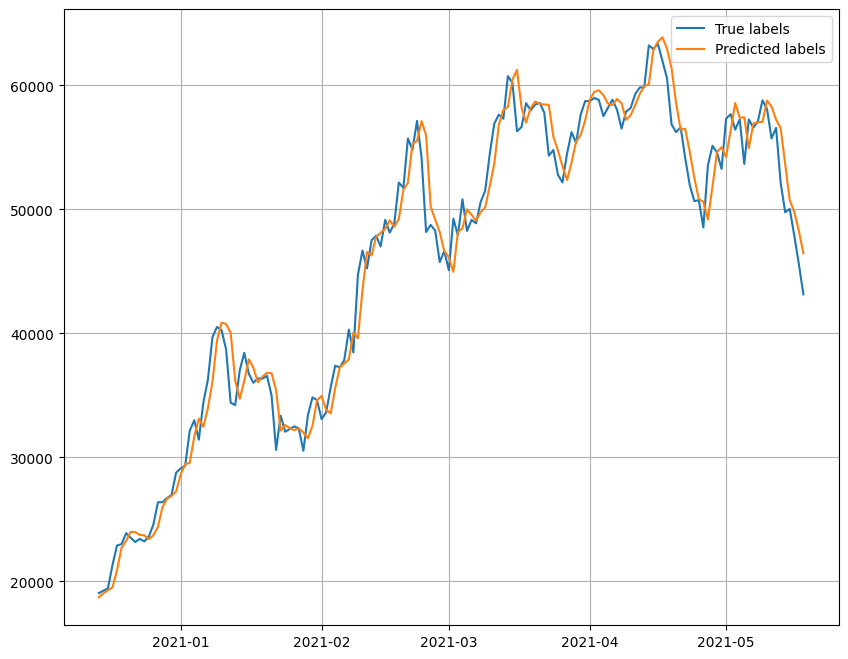

In [ ]:
#Plot
plt.figure(figsize=(10,8))
plot_ts(X_test[-len(test_windows):],tf.squeeze(test_labels),start=400,format='-',labels="True labels")
plot_ts(X_test[-len(test_windows):],model2_predictions,start=400,format="-",labels="Predicted labels")

## Model 3: Dense - w30 h1

In [ ]:
windows3, labels3 = get_windows(prices,window_size=30,horizon=1)

In [ ]:
windows3[:3], labels3[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
#Split data
train_windows3, train_labels3,test_windows3, test_labels3 = train_test_split(windows3,labels3,0.2)

In [ ]:
model3 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(1)
],name="model3")

#Compile
model3.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])
#Fit
model3.fit(x=train_windows3,
           y=train_labels3,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows3,test_labels3),
           callbacks=[checkpoint(model3.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1133.4896 - mae: 1133.4896 - mse: 5800496.5000  
Epoch 1: val_loss improved from inf to 4219.35742, saving model to experiments/model3


18/18 [==============================] - 2s 39ms/step - loss: 1133.4896 - mae: 1133.4896 - mse: 5800496.5000 - val_loss: 4219.3574 - val_mae: 4219.3574 - val_mse: 35914280.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 560.1604 - mae: 560.1604 - mse: 969496.3750
Epoch 2: val_loss improved from 4219.35742 to 2018.75525, saving model to experiments/model3


18/18 [==============================] - 1s 30ms/step - loss: 401.4686 - mae: 401.4686 - mse: 700194.8125 - val_loss: 2018.7552 - val_mae: 2018.7552 - val_mse: 10256563.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 356.9911 - mae: 356.9911 - mse: 408425.6875
Epoch 3: val_loss improved from 2018.75525 to 1245.00598, saving model to experiments/model3


18/18 [==============================] - 1s 30ms/step - loss: 292.3399 - mae: 292.3399 - mse: 395535.5625 - val_loss: 1245.0060 - val_mae: 1245.0060 - val_mse: 4760028.5000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 233.6053 - mae: 233.6053 - mse: 267346.8125
Epoch 4: val_loss improved from 1245.00598 to 1202.51526, saving model to experiments/model3


18/18 [==============================] - 1s 30ms/step - loss: 233.4167 - mae: 233.4167 - mse: 268615.1250 - val_loss: 1202.5153 - val_mae: 1202.5153 - val_mse: 4496122.5000
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 217.7594 - mae: 217.7594 - mse: 232184.6875
Epoch 5: val_loss improved from 1202.51526 to 1072.86292, saving model to experiments/model3


18/18 [==============================] - 1s 30ms/step - loss: 217.7594 - mae: 217.7594 - mse: 232184.6875 - val_loss: 1072.8629 - val_mae: 1072.8629 - val_mse: 3689575.0000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 194.0988 - mae: 194.0988 - mse: 215937.1562
Epoch 6: val_loss did not improve from 1072.86292
18/18 [==============================] - 0s 5ms/step - loss: 193.3115 - mae: 193.3115 - mse: 185622.1406 - val_loss: 1230.2076 - val_mae: 1230.2076 - val_mse: 4165742.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 190.3616 - mae: 190.3616 - mse: 288464.1250
Epoch 7: val_loss improved from 1072.86292 to 1018.49060, saving model to experiments/model3


18/18 [==============================] - 0s 27ms/step - loss: 192.1699 - mae: 192.1699 - mse: 176236.3750 - val_loss: 1018.4906 - val_mae: 1018.4906 - val_mse: 3251729.2500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 171.9469 - mae: 171.9469 - mse: 182132.9219
Epoch 8: val_loss did not improve from 1018.49060
18/18 [==============================] - 0s 5ms/step - loss: 179.2312 - mae: 179.2312 - mse: 165205.3438 - val_loss: 1132.7601 - val_mae: 1132.7601 - val_mse: 3584457.7500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 137.4930 - mae: 137.4930 - mse: 63285.0742
Epoch 9: val_loss improved from 1018.49060 to 1012.65649, saving model to experiments/model3


18/18 [==============================] - 0s 28ms/step - loss: 174.3379 - mae: 174.3379 - mse: 153610.1406 - val_loss: 1012.6565 - val_mae: 1012.6565 - val_mse: 3365871.2500
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 179.9055 - mae: 179.9055 - mse: 104586.8359
Epoch 10: val_loss improved from 1012.65649 to 1001.54315, saving model to experiments/model3


18/18 [==============================] - 0s 29ms/step - loss: 179.2000 - mae: 179.2000 - mse: 160735.2812 - val_loss: 1001.5432 - val_mae: 1001.5432 - val_mse: 2973894.2500
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 161.6093 - mae: 161.6093 - mse: 139928.7188
Epoch 11: val_loss improved from 1001.54315 to 900.99060, saving model to experiments/model3


18/18 [==============================] - 1s 53ms/step - loss: 160.5284 - mae: 160.5284 - mse: 134554.0469 - val_loss: 900.9906 - val_mae: 900.9906 - val_mse: 2726032.2500
Epoch 12/100
16/18 [=========================>....] - ETA: 0s - loss: 161.3456 - mae: 161.3456 - mse: 138828.8594
Epoch 12: val_loss did not improve from 900.99060
18/18 [==============================] - 0s 6ms/step - loss: 163.7077 - mae: 163.7077 - mse: 139379.1875 - val_loss: 957.6196 - val_mae: 957.6196 - val_mse: 2713661.2500
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 156.1402 - mae: 156.1402 - mse: 129868.2500
Epoch 13: val_loss did not improve from 900.99060
18/18 [==============================] - 0s 7ms/step - loss: 153.8229 - mae: 153.8229 - mse: 125386.5391 - val_loss: 921.9568 - val_mae: 921.9568 - val_mse: 2550293.2500
Epoch 14/100
13/18 [====================>.........] - ETA: 0s - loss: 150.7023 - mae: 150.7023 - mse: 121911.5938
Epoch 14: val_loss did not improve from 900.990

18/18 [==============================] - 1s 36ms/step - loss: 148.6719 - mae: 148.6719 - mse: 116681.2109 - val_loss: 889.2095 - val_mae: 889.2095 - val_mse: 2569705.2500
Epoch 17/100
16/18 [=========================>....] - ETA: 0s - loss: 167.9868 - mae: 167.9868 - mse: 140720.9531
Epoch 17: val_loss did not improve from 889.20953
18/18 [==============================] - 0s 6ms/step - loss: 166.5887 - mae: 166.5887 - mse: 138170.8125 - val_loss: 915.7643 - val_mae: 915.7643 - val_mse: 2419774.2500
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 103.2047 - mae: 103.2047 - mse: 39796.6992
Epoch 18: val_loss did not improve from 889.20953
18/18 [==============================] - 0s 5ms/step - loss: 142.6380 - mae: 142.6380 - mse: 110066.7656 - val_loss: 898.1648 - val_mae: 898.1648 - val_mse: 2348245.0000
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 89.0082 - mae: 89.0082 - mse: 43089.8945
Epoch 19: val_loss improved from 889.20953 to 783.1

18/18 [==============================] - 0s 28ms/step - loss: 139.9288 - mae: 139.9288 - mse: 109368.9219 - val_loss: 783.1719 - val_mae: 783.1719 - val_mse: 2040643.5000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 203.1444 - mae: 203.1444 - mse: 293238.5938
Epoch 20: val_loss did not improve from 783.17188
18/18 [==============================] - 0s 5ms/step - loss: 153.6353 - mae: 153.6353 - mse: 119552.7891 - val_loss: 794.3105 - val_mae: 794.3105 - val_mse: 2001965.8750
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 134.6086 - mae: 134.6086 - mse: 78018.7812
Epoch 21: val_loss did not improve from 783.17188
18/18 [==============================] - 0s 5ms/step - loss: 148.4326 - mae: 148.4326 - mse: 113959.2422 - val_loss: 919.9091 - val_mae: 919.9091 - val_mse: 2653720.5000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 139.7970 - mae: 139.7970 - mse: 72480.9531
Epoch 22: val_loss improved from 783.17188 to 765

18/18 [==============================] - 0s 28ms/step - loss: 152.5936 - mae: 152.5936 - mse: 115233.2812 - val_loss: 765.8127 - val_mae: 765.8127 - val_mse: 1930653.0000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 103.9239 - mae: 103.9239 - mse: 44417.3281
Epoch 23: val_loss did not improve from 765.81268
18/18 [==============================] - 0s 5ms/step - loss: 137.2159 - mae: 137.2159 - mse: 102085.4922 - val_loss: 781.5934 - val_mae: 781.5934 - val_mse: 1930125.5000
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 139.3596 - mae: 139.3596 - mse: 106621.8984
Epoch 24: val_loss did not improve from 765.81268
18/18 [==============================] - 0s 5ms/step - loss: 140.0908 - mae: 140.0908 - mse: 106718.1953 - val_loss: 805.0590 - val_mae: 805.0590 - val_mse: 1978064.8750
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 146.4693 - mae: 146.4693 - mse: 80360.6406
Epoch 25: val_loss improved from 765.81268 to 759

18/18 [==============================] - 0s 27ms/step - loss: 137.7403 - mae: 137.7403 - mse: 102612.8125 - val_loss: 759.1042 - val_mae: 759.1042 - val_mse: 1839919.2500
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 136.8562 - mae: 136.8562 - mse: 100131.5781
Epoch 26: val_loss did not improve from 759.10425
18/18 [==============================] - 0s 6ms/step - loss: 135.9850 - mae: 135.9850 - mse: 99333.1484 - val_loss: 980.2626 - val_mae: 980.2626 - val_mse: 2599681.2500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 176.2515 - mae: 176.2515 - mse: 160349.3750
Epoch 27: val_loss did not improve from 759.10425
18/18 [==============================] - 0s 5ms/step - loss: 157.4411 - mae: 157.4411 - mse: 118336.4141 - val_loss: 887.9632 - val_mae: 887.9632 - val_mse: 2447286.7500
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 220.0743 - mae: 220.0743 - mse: 225912.0938
Epoch 28: val_loss improved from 759.10425 to 74

18/18 [==============================] - 0s 29ms/step - loss: 141.0621 - mae: 141.0621 - mse: 104195.6016 - val_loss: 746.5746 - val_mae: 746.5746 - val_mse: 1816776.6250
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 128.9282 - mae: 128.9282 - mse: 92215.1875
Epoch 29: val_loss improved from 746.57458 to 735.48053, saving model to experiments/model3


18/18 [==============================] - 0s 28ms/step - loss: 130.7690 - mae: 130.7690 - mse: 95530.4453 - val_loss: 735.4805 - val_mae: 735.4805 - val_mse: 1745877.1250
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 131.7692 - mae: 131.7692 - mse: 84656.4844
Epoch 30: val_loss did not improve from 735.48053
18/18 [==============================] - 0s 5ms/step - loss: 131.7593 - mae: 131.7593 - mse: 95588.9453 - val_loss: 744.3229 - val_mae: 744.3229 - val_mse: 1808575.1250
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 85.6635 - mae: 85.6635 - mse: 35102.6328
Epoch 31: val_loss did not improve from 735.48053
18/18 [==============================] - 0s 6ms/step - loss: 130.9915 - mae: 130.9915 - mse: 95683.3359 - val_loss: 937.0859 - val_mae: 937.0859 - val_mse: 2392352.0000
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 173.7650 - mae: 173.7650 - mse: 104297.7891
Epoch 32: val_loss did not improve from 735.48053
18/1

18/18 [==============================] - 0s 28ms/step - loss: 137.5660 - mae: 137.5660 - mse: 97899.4688 - val_loss: 708.6332 - val_mae: 708.6332 - val_mse: 1633232.5000
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 151.4672 - mae: 151.4672 - mse: 100251.5781
Epoch 38: val_loss did not improve from 708.63318
18/18 [==============================] - 0s 6ms/step - loss: 130.3555 - mae: 130.3555 - mse: 93524.5078 - val_loss: 750.6802 - val_mae: 750.6802 - val_mse: 1812966.1250
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 143.3361 - mae: 143.3361 - mse: 91975.9375
Epoch 39: val_loss did not improve from 708.63318
18/18 [==============================] - 0s 5ms/step - loss: 137.4453 - mae: 137.4453 - mse: 97125.1719 - val_loss: 844.9698 - val_mae: 844.9698 - val_mse: 2226513.5000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 164.8340 - mae: 164.8340 - mse: 90666.1328
Epoch 40: val_loss did not improve from 708.63318
18

18/18 [==============================] - 1s 30ms/step - loss: 137.8780 - mae: 137.8780 - mse: 97418.8203 - val_loss: 708.2025 - val_mae: 708.2025 - val_mse: 1627054.7500
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 119.5789 - mae: 119.5789 - mse: 57546.9219
Epoch 44: val_loss improved from 708.20245 to 704.88922, saving model to experiments/model3


18/18 [==============================] - 0s 28ms/step - loss: 128.1371 - mae: 128.1371 - mse: 90834.2734 - val_loss: 704.8892 - val_mae: 704.8892 - val_mse: 1581467.3750
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 83.8911 - mae: 83.8911 - mse: 44741.5703
Epoch 45: val_loss did not improve from 704.88922
18/18 [==============================] - 0s 5ms/step - loss: 129.7579 - mae: 129.7579 - mse: 91100.2344 - val_loss: 721.9289 - val_mae: 721.9289 - val_mse: 1684849.7500
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 94.3203 - mae: 94.3203 - mse: 46560.4570
Epoch 46: val_loss did not improve from 704.88922
18/18 [==============================] - 0s 6ms/step - loss: 129.3134 - mae: 129.3134 - mse: 88953.1953 - val_loss: 750.2799 - val_mae: 750.2799 - val_mse: 1707228.6250
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 137.8336 - mae: 137.8336 - mse: 111605.6797
Epoch 47: val_loss improved from 704.88922 to 690.46680,

18/18 [==============================] - 0s 28ms/step - loss: 126.9801 - mae: 126.9801 - mse: 86609.5547 - val_loss: 690.4668 - val_mae: 690.4668 - val_mse: 1559297.8750
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 97.4704 - mae: 97.4704 - mse: 49074.8047
Epoch 48: val_loss did not improve from 690.46680
18/18 [==============================] - 0s 6ms/step - loss: 128.0825 - mae: 128.0825 - mse: 90214.5938 - val_loss: 742.9299 - val_mae: 742.9299 - val_mse: 1673179.1250
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 110.4741 - mae: 110.4741 - mse: 48598.8320
Epoch 49: val_loss improved from 690.46680 to 684.22485, saving model to experiments/model3


18/18 [==============================] - 0s 28ms/step - loss: 126.1067 - mae: 126.1067 - mse: 86499.4844 - val_loss: 684.2249 - val_mae: 684.2249 - val_mse: 1508681.1250
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 100.1993 - mae: 100.1993 - mse: 91099.8594
Epoch 50: val_loss did not improve from 684.22485
18/18 [==============================] - 0s 5ms/step - loss: 127.9774 - mae: 127.9774 - mse: 89688.0547 - val_loss: 958.6520 - val_mae: 958.6520 - val_mse: 2417621.2500
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 139.1148 - mae: 139.1148 - mse: 96975.7500
Epoch 51: val_loss did not improve from 684.22485
18/18 [==============================] - 0s 5ms/step - loss: 144.4996 - mae: 144.4996 - mse: 102485.8359 - val_loss: 949.4235 - val_mae: 949.4235 - val_mse: 2379505.2500
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 162.2937 - mae: 162.2937 - mse: 97362.1875
Epoch 52: val_loss did not improve from 684.22485
18

18/18 [==============================] - 1s 29ms/step - loss: 123.7573 - mae: 123.7573 - mse: 86191.9219 - val_loss: 668.9349 - val_mae: 668.9349 - val_mse: 1456442.3750
Epoch 56/100
17/18 [===========================>..] - ETA: 0s - loss: 124.7900 - mae: 124.7900 - mse: 85205.8125
Epoch 56: val_loss did not improve from 668.93488
18/18 [==============================] - 0s 6ms/step - loss: 124.1151 - mae: 124.1151 - mse: 84493.0938 - val_loss: 779.1747 - val_mae: 779.1746 - val_mse: 1775268.3750
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 134.3548 - mae: 134.3548 - mse: 96532.2188
Epoch 57: val_loss did not improve from 668.93488
18/18 [==============================] - 0s 6ms/step - loss: 151.6017 - mae: 151.6017 - mse: 110004.1250 - val_loss: 764.7137 - val_mae: 764.7137 - val_mse: 1716904.2500
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 124.7074 - mae: 124.7074 - mse: 108447.2578
Epoch 58: val_loss did not improve from 668.93488
1

18/18 [==============================] - 1s 41ms/step - loss: 127.1632 - mae: 127.1632 - mse: 86482.7891 - val_loss: 651.6818 - val_mae: 651.6818 - val_mse: 1399776.1250
Epoch 71/100
12/18 [===================>..........] - ETA: 0s - loss: 135.7849 - mae: 135.7849 - mse: 96714.3203
Epoch 71: val_loss did not improve from 651.68176
18/18 [==============================] - 0s 8ms/step - loss: 124.9735 - mae: 124.9735 - mse: 82409.8047 - val_loss: 664.6572 - val_mae: 664.6572 - val_mse: 1449019.3750
Epoch 72/100
13/18 [====================>.........] - ETA: 0s - loss: 117.7633 - mae: 117.7633 - mse: 80447.9297 
Epoch 72: val_loss did not improve from 651.68176
18/18 [==============================] - 0s 8ms/step - loss: 121.0674 - mae: 121.0674 - mse: 83189.2109 - val_loss: 783.6515 - val_mae: 783.6515 - val_mse: 1771875.5000
Epoch 73/100
13/18 [====================>.........] - ETA: 0s - loss: 127.8856 - mae: 127.8856 - mse: 87555.0391
Epoch 73: val_loss did not improve from 651.68176
18

18/18 [==============================] - 0s 29ms/step - loss: 135.0866 - mae: 135.0866 - mse: 93399.8203 - val_loss: 642.3433 - val_mae: 642.3433 - val_mse: 1367324.5000
Epoch 84/100
18/18 [==============================] - ETA: 0s - loss: 124.3151 - mae: 124.3151 - mse: 84110.4844
Epoch 84: val_loss did not improve from 642.34332
18/18 [==============================] - 0s 6ms/step - loss: 124.3151 - mae: 124.3151 - mse: 84110.4844 - val_loss: 745.2185 - val_mae: 745.2185 - val_mse: 1717687.3750
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 123.2347 - mae: 123.2347 - mse: 65669.1094
Epoch 85: val_loss did not improve from 642.34332
18/18 [==============================] - 0s 6ms/step - loss: 134.2435 - mae: 134.2435 - mse: 89084.5078 - val_loss: 698.7949 - val_mae: 698.7949 - val_mse: 1553396.8750
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 153.9664 - mae: 153.9664 - mse: 93353.5469
Epoch 86: val_loss did not improve from 642.34332
18/

18/18 [==============================] - 1s 46ms/step - loss: 119.1807 - mae: 119.1807 - mse: 80602.2891 - val_loss: 632.6786 - val_mae: 632.6786 - val_mse: 1341954.0000
Epoch 98/100
15/18 [========================>.....] - ETA: 0s - loss: 115.2583 - mae: 115.2583 - mse: 81149.7500
Epoch 98: val_loss did not improve from 632.67865
18/18 [==============================] - 0s 7ms/step - loss: 116.1879 - mae: 116.1879 - mse: 80716.9297 - val_loss: 755.7948 - val_mae: 755.7948 - val_mse: 1667342.0000
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 92.2626 - mae: 92.2626 - mse: 28699.9766
Epoch 99: val_loss did not improve from 632.67865
18/18 [==============================] - 0s 5ms/step - loss: 150.0544 - mae: 150.0544 - mse: 98854.9062 - val_loss: 713.3768 - val_mae: 713.3768 - val_mse: 1592896.8750
Epoch 100/100
 1/18 [>.............................] - ETA: 0s - loss: 117.4089 - mae: 117.4089 - mse: 107932.2266
Epoch 100: val_loss did not improve from 632.67865
18

In [ ]:
model_3best = tf.keras.models.load_model("/content/experiments/model3")
model_3best.evaluate(test_windows3,test_labels3)

18/18 [==============================] - 0s 2ms/step - loss: 632.6785 - mae: 632.6785 - mse: 1341953.6250


[632.6785278320312, 632.6785278320312, 1341953.625]

In [ ]:
model3_prediction = np.squeeze(model_3best.predict(test_windows3))
model3_prediction[:3]

18/18 [==============================] - 0s 2ms/step


array([8859.802, 8862.129, 8807.552], dtype=float32)

In [ ]:
model_3_results = error_dict(np.squeeze(test_labels3),model3_prediction)
model_3_results

{'MAE': 632.6785315111318,
 'MSE': 1341953.6598687712,
 'RMSE': 1158.427235465729,
 'MASE': 1.105928188781331,
 'MAPE': 2.8399718}

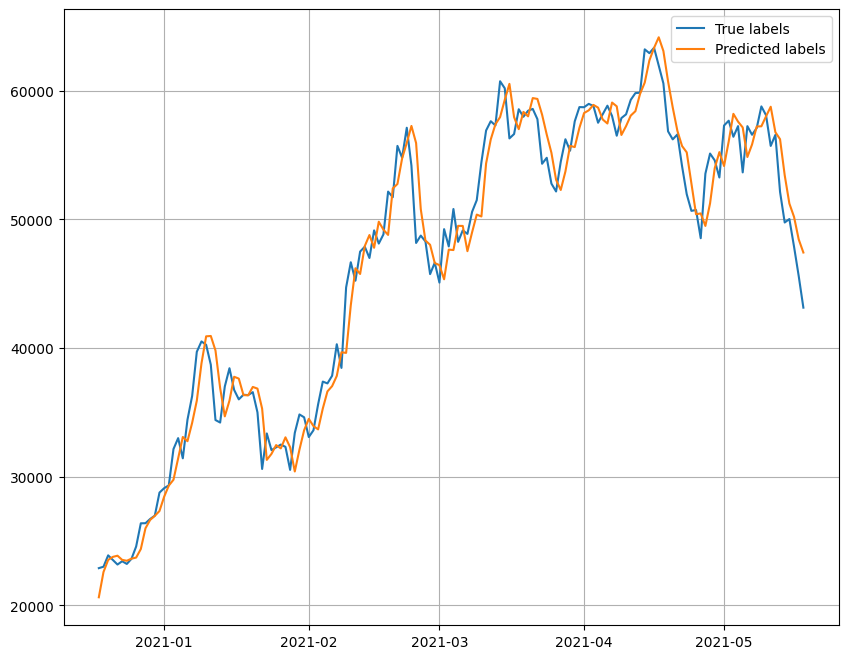

In [ ]:
plt.figure(figsize=(10,8))
plot_ts(X_test[-len(test_windows3):],test_labels3,start=400,format='-',labels="True labels")
plot_ts(X_test[-len(test_windows3):],model3_prediction,start=400,format='-',labels="Predicted labels")

In [ ]:
#AUTOCORRELATION ????????

#Model 4: Dense - w30 h7

In [ ]:
windows4, labels4 = get_windows(prices,30,7)
windows4[:2], labels4[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]]),
 array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
         248.25333],
        [198.04883, 198.93233, 200.543  , 210.3075 , 225.02   , 248.25333,
         262.32666]]))

In [ ]:
train_windows4, train_labels4,test_windows4, test_labels4 = train_test_split(windows4,labels4,0.2)
train_windows4[0], train_labels4[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333]))

In [ ]:
model4 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(7)
],name="model4")

#Compile
model4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])
#Fit
model4.fit(x=train_windows4,
           y=train_labels4,
           batch_size=128,
           epochs=100,
           validation_data=(test_windows4,test_labels4),
           callbacks=[checkpoint(model4.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1252.1331 - mae: 1252.1331 - mse: 8019883.0000  
Epoch 1: val_loss improved from inf to 2546.73389, saving model to experiments/model4


18/18 [==============================] - 1s 37ms/step - loss: 1208.8398 - mae: 1208.8398 - mse: 7573725.5000 - val_loss: 2546.7339 - val_mae: 2546.7339 - val_mse: 18033272.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 461.7233 - mae: 461.7233 - mse: 766782.6250
Epoch 2: val_loss improved from 2546.73389 to 2138.66382, saving model to experiments/model4


18/18 [==============================] - 0s 28ms/step - loss: 464.6466 - mae: 464.6466 - mse: 1059064.8750 - val_loss: 2138.6638 - val_mae: 2138.6638 - val_mse: 14254906.0000
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 391.8493 - mae: 391.8493 - mse: 790789.5000
Epoch 3: val_loss did not improve from 2138.66382
18/18 [==============================] - 0s 5ms/step - loss: 391.8493 - mae: 391.8493 - mse: 790789.5000 - val_loss: 2211.4973 - val_mae: 2211.4973 - val_mse: 14760763.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 308.2419 - mae: 308.2419 - mse: 450818.6250
Epoch 4: val_loss improved from 2138.66382 to 1828.11658, saving model to experiments/model4


18/18 [==============================] - 0s 28ms/step - loss: 363.7310 - mae: 363.7310 - mse: 683485.8750 - val_loss: 1828.1166 - val_mae: 1828.1166 - val_mse: 10770472.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 284.5602 - mae: 284.5602 - mse: 365358.2812
Epoch 5: val_loss did not improve from 1828.11658
18/18 [==============================] - 0s 5ms/step - loss: 343.6016 - mae: 343.6016 - mse: 596801.5000 - val_loss: 1842.9401 - val_mae: 1842.9401 - val_mse: 10527317.0000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 321.9088 - mae: 321.9088 - mse: 522642.4375
Epoch 6: val_loss improved from 1828.11658 to 1616.01245, saving model to experiments/model4


18/18 [==============================] - 0s 29ms/step - loss: 321.9088 - mae: 321.9088 - mse: 522642.4375 - val_loss: 1616.0125 - val_mae: 1616.0125 - val_mse: 8288128.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 323.1146 - mae: 323.1146 - mse: 443449.5000
Epoch 7: val_loss did not improve from 1616.01245
18/18 [==============================] - 0s 5ms/step - loss: 309.2360 - mae: 309.2360 - mse: 481540.7188 - val_loss: 1659.0415 - val_mae: 1659.0415 - val_mse: 8548811.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 323.5659 - mae: 323.5659 - mse: 412165.8750
Epoch 8: val_loss improved from 1616.01245 to 1584.20276, saving model to experiments/model4


18/18 [==============================] - 0s 29ms/step - loss: 301.6398 - mae: 301.6398 - mse: 455066.0312 - val_loss: 1584.2028 - val_mae: 1584.2028 - val_mse: 8036387.5000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 276.2206 - mae: 276.2206 - mse: 422387.4688
Epoch 9: val_loss improved from 1584.20276 to 1529.81372, saving model to experiments/model4


18/18 [==============================] - 0s 29ms/step - loss: 286.8820 - mae: 286.8820 - mse: 424313.4375 - val_loss: 1529.8137 - val_mae: 1529.8137 - val_mse: 7650454.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 250.5296 - mae: 250.5296 - mse: 293536.8438
Epoch 10: val_loss improved from 1529.81372 to 1505.54248, saving model to experiments/model4


18/18 [==============================] - 0s 28ms/step - loss: 284.1008 - mae: 284.1008 - mse: 411654.9375 - val_loss: 1505.5425 - val_mae: 1505.5425 - val_mse: 7423025.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 306.2969 - mae: 306.2969 - mse: 397804.6875
Epoch 11: val_loss did not improve from 1505.54248
18/18 [==============================] - 0s 5ms/step - loss: 278.7017 - mae: 278.7017 - mse: 400148.3750 - val_loss: 1511.7211 - val_mae: 1511.7211 - val_mse: 7415213.0000
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 250.5014 - mae: 250.5014 - mse: 291808.0938
Epoch 12: val_loss did not improve from 1505.54248
18/18 [==============================] - 0s 5ms/step - loss: 276.0980 - mae: 276.0980 - mse: 392289.6875 - val_loss: 1555.1234 - val_mae: 1555.1234 - val_mse: 7613403.0000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 288.5480 - mae: 288.5480 - mse: 408526.6875
Epoch 13: val_loss did not improve from

18/18 [==============================] - 0s 28ms/step - loss: 265.1804 - mae: 265.1804 - mse: 360218.7500 - val_loss: 1486.9915 - val_mae: 1486.9915 - val_mse: 7045494.5000
Epoch 17/100
16/18 [=========================>....] - ETA: 0s - loss: 259.9485 - mae: 259.9485 - mse: 352262.6875
Epoch 17: val_loss improved from 1486.99146 to 1461.48328, saving model to experiments/model4


18/18 [==============================] - 1s 29ms/step - loss: 261.9037 - mae: 261.9037 - mse: 355254.9375 - val_loss: 1461.4833 - val_mae: 1461.4833 - val_mse: 6872056.0000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 248.9063 - mae: 248.9063 - mse: 391710.6875
Epoch 18: val_loss did not improve from 1461.48328
18/18 [==============================] - 0s 5ms/step - loss: 258.2551 - mae: 258.2551 - mse: 344643.9062 - val_loss: 1580.9680 - val_mae: 1580.9680 - val_mse: 7699945.0000
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 215.6306 - mae: 215.6306 - mse: 295604.7500
Epoch 19: val_loss did not improve from 1461.48328
18/18 [==============================] - 0s 5ms/step - loss: 262.4771 - mae: 262.4771 - mse: 350046.8438 - val_loss: 1504.4047 - val_mae: 1504.4047 - val_mse: 7113051.5000
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 263.8084 - mae: 263.8084 - mse: 350618.5312
Epoch 20: val_loss did not improve from

18/18 [==============================] - 0s 28ms/step - loss: 252.3855 - mae: 252.3855 - mse: 333230.1875 - val_loss: 1388.6052 - val_mae: 1388.6052 - val_mse: 6431059.5000
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 259.7121 - mae: 259.7121 - mse: 337228.6250
Epoch 23: val_loss improved from 1388.60522 to 1383.25879, saving model to experiments/model4


18/18 [==============================] - 0s 29ms/step - loss: 256.8588 - mae: 256.8588 - mse: 332992.5938 - val_loss: 1383.2588 - val_mae: 1383.2588 - val_mse: 6365544.5000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 244.8134 - mae: 244.8134 - mse: 285909.6562
Epoch 24: val_loss did not improve from 1383.25879
18/18 [==============================] - 0s 5ms/step - loss: 259.8578 - mae: 259.8578 - mse: 344546.6562 - val_loss: 1501.9497 - val_mae: 1501.9497 - val_mse: 6909002.5000
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 282.0475 - mae: 282.0475 - mse: 417497.5000
Epoch 25: val_loss did not improve from 1383.25879
18/18 [==============================] - 0s 6ms/step - loss: 263.5480 - mae: 263.5480 - mse: 338057.5000 - val_loss: 1750.4292 - val_mae: 1750.4292 - val_mse: 8666814.0000
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 276.9481 - mae: 276.9481 - mse: 327051.0625
Epoch 26: val_loss did not improve from

18/18 [==============================] - 1s 33ms/step - loss: 248.7300 - mae: 248.7300 - mse: 320619.8438 - val_loss: 1355.0704 - val_mae: 1355.0704 - val_mse: 6215250.0000
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 250.2991 - mae: 250.2991 - mse: 320795.0625
Epoch 28: val_loss did not improve from 1355.07043
18/18 [==============================] - 0s 8ms/step - loss: 246.5515 - mae: 246.5515 - mse: 315573.9062 - val_loss: 1406.9495 - val_mae: 1406.9495 - val_mse: 6416183.5000
Epoch 29/100
15/18 [========================>.....] - ETA: 0s - loss: 235.9411 - mae: 235.9411 - mse: 295285.9062
Epoch 29: val_loss did not improve from 1355.07043
18/18 [==============================] - 0s 7ms/step - loss: 240.5079 - mae: 240.5079 - mse: 306586.5000 - val_loss: 1379.3204 - val_mae: 1379.3204 - val_mse: 6309682.5000
Epoch 30/100
14/18 [======================>.......] - ETA: 0s - loss: 242.7852 - mae: 242.7852 - mse: 306551.4375
Epoch 30: val_loss did not improve from

18/18 [==============================] - 1s 41ms/step - loss: 247.5442 - mae: 247.5442 - mse: 310918.0625 - val_loss: 1348.6980 - val_mae: 1348.6980 - val_mse: 6180569.5000
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 195.6837 - mae: 195.6837 - mse: 194052.6875
Epoch 33: val_loss did not improve from 1348.69800
18/18 [==============================] - 0s 5ms/step - loss: 240.0941 - mae: 240.0941 - mse: 302860.4375 - val_loss: 1387.8997 - val_mae: 1387.8997 - val_mse: 6245135.5000
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 211.2602 - mae: 211.2602 - mse: 294789.3750
Epoch 34: val_loss improved from 1348.69800 to 1309.90930, saving model to experiments/model4


18/18 [==============================] - 0s 29ms/step - loss: 244.7959 - mae: 244.7959 - mse: 305864.7812 - val_loss: 1309.9093 - val_mae: 1309.9093 - val_mse: 5912330.0000
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 188.1026 - mae: 188.1026 - mse: 190575.6875
Epoch 35: val_loss did not improve from 1309.90930
18/18 [==============================] - 0s 6ms/step - loss: 235.3792 - mae: 235.3792 - mse: 295026.4062 - val_loss: 1341.4062 - val_mae: 1341.4062 - val_mse: 6078187.0000
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 192.3690 - mae: 192.3690 - mse: 173886.3594
Epoch 36: val_loss improved from 1309.90930 to 1306.25879, saving model to experiments/model4


18/18 [==============================] - 1s 43ms/step - loss: 233.1827 - mae: 233.1827 - mse: 291223.7812 - val_loss: 1306.2588 - val_mae: 1306.2588 - val_mse: 5872006.5000
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 266.4080 - mae: 266.4080 - mse: 354983.3125
Epoch 37: val_loss did not improve from 1306.25879
18/18 [==============================] - 0s 6ms/step - loss: 235.4560 - mae: 235.4560 - mse: 296427.1562 - val_loss: 1322.9395 - val_mae: 1322.9395 - val_mse: 5909902.0000
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 235.9928 - mae: 235.9928 - mse: 295509.5625
Epoch 38: val_loss improved from 1306.25879 to 1292.01257, saving model to experiments/model4


18/18 [==============================] - 1s 29ms/step - loss: 237.1437 - mae: 237.1437 - mse: 296113.8125 - val_loss: 1292.0126 - val_mae: 1292.0126 - val_mse: 5816356.0000
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 240.7703 - mae: 240.7703 - mse: 296837.2500
Epoch 39: val_loss did not improve from 1292.01257
18/18 [==============================] - 0s 6ms/step - loss: 241.8190 - mae: 241.8190 - mse: 302678.7188 - val_loss: 1297.4015 - val_mae: 1297.4015 - val_mse: 5771339.5000
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 237.8609 - mae: 237.8609 - mse: 292627.4062
Epoch 40: val_loss did not improve from 1292.01257
18/18 [==============================] - 0s 6ms/step - loss: 237.8609 - mae: 237.8609 - mse: 292627.4062 - val_loss: 1335.0360 - val_mae: 1335.0360 - val_mse: 5973578.5000
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 207.1020 - mae: 207.1020 - mse: 216158.2812
Epoch 41: val_loss did not improve from

18/18 [==============================] - 1s 29ms/step - loss: 239.7258 - mae: 239.7258 - mse: 293852.5000 - val_loss: 1280.3894 - val_mae: 1280.3894 - val_mse: 5691458.0000
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 296.4125 - mae: 296.4125 - mse: 410651.4375
Epoch 49: val_loss did not improve from 1280.38940
18/18 [==============================] - 0s 5ms/step - loss: 231.3645 - mae: 231.3645 - mse: 284388.0938 - val_loss: 1332.2329 - val_mae: 1332.2329 - val_mse: 5904841.5000
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 237.4739 - mae: 237.4739 - mse: 349556.9375
Epoch 50: val_loss did not improve from 1280.38940
18/18 [==============================] - 0s 5ms/step - loss: 229.8417 - mae: 229.8417 - mse: 281488.0938 - val_loss: 1388.6165 - val_mae: 1388.6165 - val_mse: 6222868.5000
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 233.0227 - mae: 233.0227 - mse: 285615.8750
Epoch 51: val_loss did not improve from

18/18 [==============================] - 0s 29ms/step - loss: 231.5194 - mae: 231.5194 - mse: 284199.0938 - val_loss: 1265.7606 - val_mae: 1265.7606 - val_mse: 5628473.5000
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 233.2225 - mae: 233.2225 - mse: 285810.0000
Epoch 53: val_loss did not improve from 1265.76062
18/18 [==============================] - 0s 6ms/step - loss: 233.2225 - mae: 233.2225 - mse: 285810.0000 - val_loss: 1347.1600 - val_mae: 1347.1600 - val_mse: 6029859.0000
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 212.2947 - mae: 212.2947 - mse: 260506.4062
Epoch 54: val_loss did not improve from 1265.76062
18/18 [==============================] - 0s 5ms/step - loss: 231.8418 - mae: 231.8418 - mse: 283227.2500 - val_loss: 1351.1493 - val_mae: 1351.1493 - val_mse: 5975203.5000
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 307.3736 - mae: 307.3736 - mse: 475233.0000
Epoch 55: val_loss did not improve from

18/18 [==============================] - 0s 28ms/step - loss: 227.9825 - mae: 227.9825 - mse: 272006.1250 - val_loss: 1265.6230 - val_mae: 1265.6230 - val_mse: 5644005.5000
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 222.6049 - mae: 222.6049 - mse: 246625.6250
Epoch 63: val_loss did not improve from 1265.62305
18/18 [==============================] - 0s 6ms/step - loss: 229.4173 - mae: 229.4173 - mse: 277924.7188 - val_loss: 1366.2142 - val_mae: 1366.2142 - val_mse: 6099049.0000
Epoch 64/100
18/18 [==============================] - ETA: 0s - loss: 230.1448 - mae: 230.1448 - mse: 278564.5625
Epoch 64: val_loss improved from 1265.62305 to 1249.71985, saving model to experiments/model4


18/18 [==============================] - 1s 29ms/step - loss: 230.1448 - mae: 230.1448 - mse: 278564.5625 - val_loss: 1249.7198 - val_mae: 1249.7198 - val_mse: 5444832.5000
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 225.8867 - mae: 225.8867 - mse: 274500.5938
Epoch 65: val_loss did not improve from 1249.71985
18/18 [==============================] - 0s 6ms/step - loss: 225.8867 - mae: 225.8867 - mse: 274500.5938 - val_loss: 1320.5286 - val_mae: 1320.5286 - val_mse: 5756320.5000
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 188.2371 - mae: 188.2371 - mse: 265910.9688
Epoch 66: val_loss improved from 1249.71985 to 1242.24756, saving model to experiments/model4


18/18 [==============================] - 0s 29ms/step - loss: 225.6382 - mae: 225.6382 - mse: 274075.9688 - val_loss: 1242.2476 - val_mae: 1242.2476 - val_mse: 5423357.5000
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 245.5961 - mae: 245.5961 - mse: 274578.4375
Epoch 67: val_loss did not improve from 1242.24756
18/18 [==============================] - 0s 5ms/step - loss: 225.6210 - mae: 225.6210 - mse: 272051.4688 - val_loss: 1248.3582 - val_mae: 1248.3582 - val_mse: 5465990.5000
Epoch 68/100
17/18 [===========================>..] - ETA: 0s - loss: 232.8080 - mae: 232.8080 - mse: 282399.0938
Epoch 68: val_loss did not improve from 1242.24756
18/18 [==============================] - 0s 6ms/step - loss: 233.4950 - mae: 233.4950 - mse: 282260.4062 - val_loss: 1461.7255 - val_mae: 1461.7255 - val_mse: 6570617.0000
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 203.1804 - mae: 203.1804 - mse: 224386.6562
Epoch 69: val_loss did not improve from

18/18 [==============================] - 0s 28ms/step - loss: 244.3098 - mae: 244.3098 - mse: 294102.4375 - val_loss: 1241.8312 - val_mae: 1241.8312 - val_mse: 5369951.0000
Epoch 74/100
18/18 [==============================] - ETA: 0s - loss: 227.5031 - mae: 227.5031 - mse: 272868.0625
Epoch 74: val_loss did not improve from 1241.83118
18/18 [==============================] - 0s 7ms/step - loss: 227.5031 - mae: 227.5031 - mse: 272868.0625 - val_loss: 1317.0682 - val_mae: 1317.0682 - val_mse: 5655821.5000
Epoch 75/100
18/18 [==============================] - ETA: 0s - loss: 224.7661 - mae: 224.7661 - mse: 271970.4688
Epoch 75: val_loss improved from 1241.83118 to 1228.09314, saving model to experiments/model4


18/18 [==============================] - 1s 30ms/step - loss: 224.7661 - mae: 224.7661 - mse: 271970.4688 - val_loss: 1228.0931 - val_mae: 1228.0931 - val_mse: 5388338.0000
Epoch 76/100
15/18 [========================>.....] - ETA: 0s - loss: 216.3674 - mae: 216.3674 - mse: 255678.3438
Epoch 76: val_loss did not improve from 1228.09314
18/18 [==============================] - 0s 6ms/step - loss: 222.4936 - mae: 222.4936 - mse: 267077.8750 - val_loss: 1317.2069 - val_mae: 1317.2069 - val_mse: 5822419.0000
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 164.3142 - mae: 164.3142 - mse: 134364.8750
Epoch 77: val_loss did not improve from 1228.09314
18/18 [==============================] - 0s 5ms/step - loss: 227.3243 - mae: 227.3243 - mse: 272607.3438 - val_loss: 1291.2324 - val_mae: 1291.2324 - val_mse: 5624568.5000
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 272.3105 - mae: 272.3105 - mse: 456206.5625
Epoch 78: val_loss did not improve from

In [ ]:
model4_best = tf.keras.models.load_model("/content/experiments/model4")
model4_best.evaluate(test_windows4,test_labels4)

18/18 [==============================] - 0s 2ms/step - loss: 1228.0933 - mae: 1228.0933 - mse: 5388337.5000


[1228.09326171875, 1228.09326171875, 5388337.5]

In [ ]:
model_4_preds = np.squeeze(model4_best.predict(test_windows4))
model_4_preds[:4] , model_4_preds.shape

18/18 [==============================] - 0s 1ms/step


(array([[9443.858, 9627.954, 9447.834, 9652.789, 9509.583, 9419.246,
         9260.567],
        [9128.146, 9244.812, 9067.671, 9260.136, 9261.06 , 9066.583,
         8976.76 ],
        [8706.009, 8781.366, 8970.333, 9054.505, 9162.277, 8980.417,
         9057.537],
        [8870.704, 8937.489, 9064.047, 9281.077, 9143.624, 9327.042,
         9345.122]], dtype=float32),
 (551, 7))

In [ ]:
model_4_results = error_dict(test_labels4, model_4_preds)
model_4_results

{'MAE': 1228.0930555670006,
 'MSE': 5388337.482262242,
 'RMSE': 2321.279277093181,
 'MASE': 2.1853227561798296,
 'MAPE': 5.491646}

**Visualize**

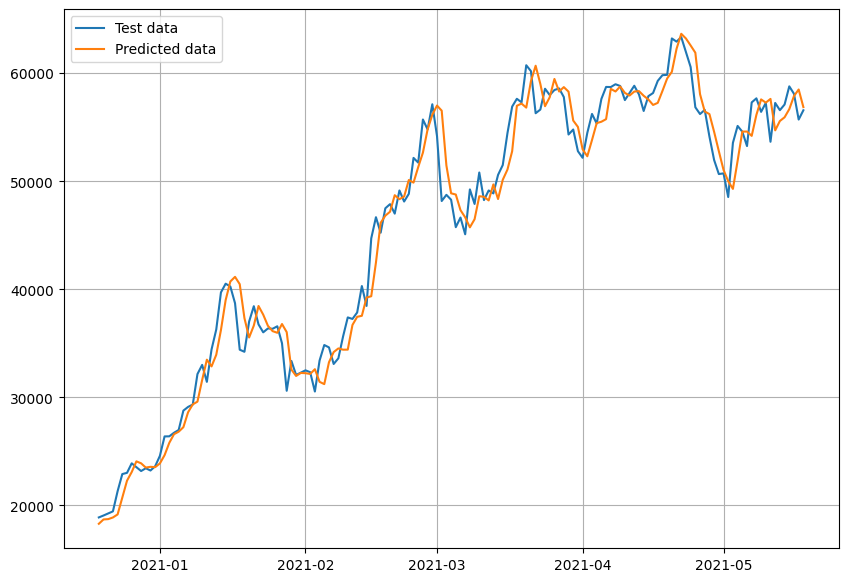

In [ ]:
plt.figure(figsize=(10,7))
plot_ts(X_test[-len(test_windows4):],tf.squeeze(test_labels4[:,0]),400,format='-',labels="Test data")
plot_ts(X_test[-len(test_windows4):],model_4_preds[:,0],400,format='-',labels="Predicted data")

In [ ]:
model2_results,model_4_results,naive_results,model_3_results

({'MAE': 589.5566666573994,
  'MSE': 1248069.5163647125,
  'RMSE': 1117.1703166324787,
  'MASE': 1.0356876629467195,
  'MAPE': 2.686196},
 {'MAE': 1228.0930555670006,
  'MSE': 5388337.482262242,
  'RMSE': 2321.279277093181,
  'MASE': 2.1853227561798296,
  'MAPE': 5.491646},
 {'MAE': 567.9802273457541,
  'MSE': 1147547.1250238959,
  'RMSE': 1071.2362601330744,
  'MASE': 0.9995699939182624,
  'MAPE': 2.516524929982267},
 {'MAE': 632.6785315111318,
  'MSE': 1341953.6598687712,
  'RMSE': 1158.427235465729,
  'MASE': 1.105928188781331,
  'MAPE': 2.8399718})

**Compare**

In [ ]:
import pandas as pd
Results = pd.DataFrame([naive_results,
              model2_results,
              model_3_results,
              model_4_results
              ],index=["Naive","Model2","Model3","Model4"])
Results

,MAE,MSE,RMSE,MASE,MAPE
Naive,567.980227,1.147547e+06,1071.236260,0.999570,2.516525
Model2,589.556667,1.248070e+06,1117.170317,1.035688,2.686196
Model3,632.678532,1.341954e+06,1158.427235,1.105928,2.839972
Model4,1228.093056,5.388337e+06,2321.279277,2.185323,5.491646


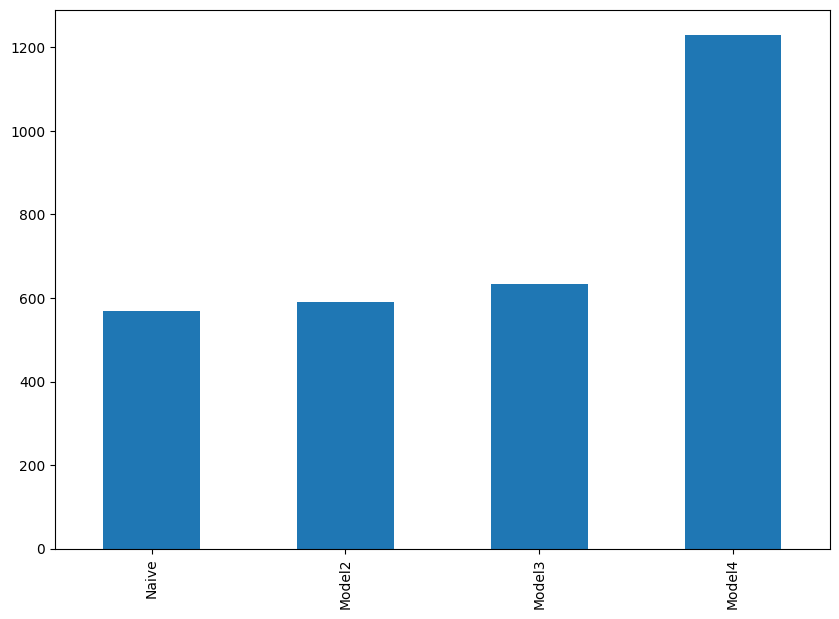

In [ ]:
Results["MAE"].plot(figsize=(10,7),kind="bar");

Except from naive model, the best one is model 2, which is window=7, horizon=1

##Model 4 Conv1D
- Windows=7, horizon =1

In [ ]:
WINDOW=7
HORIZON=1

preparing for conv - BATCH_SIZE,TIMESTEPS,INPUT_DIM
- Using: train_windows, train_labels,test_windows, test_labels made for model 2

In [ ]:
expanding_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [ ]:
expanding_layer(train_windows[0]), train_windows[0]

(<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
 array([[123.65499],
        [125.455  ],
        [108.58483],
        [118.67466],
        [121.33866],
        [120.65533],
        [121.795  ]], dtype=float32)>,
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ]))

In [ ]:
#Builing model
model_5 = tf.keras.Sequential([
    expanding_layer,
    layers.Conv1D(128,
                  kernel_size=5,
                  padding="causal"),
    layers.Dense(HORIZON)              
],name="model_5")
#Compile
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])
#Fit
model_5.fit(x=train_windows,
            y=train_labels,
            verbose=0,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[checkpoint(model_5.name)])


Epoch 1: val_loss improved from inf to 4049.02075, saving model to experiments/model_5



Epoch 2: val_loss improved from 4049.02075 to 1747.84583, saving model to experiments/model_5



Epoch 3: val_loss improved from 1747.84583 to 1155.35645, saving model to experiments/model_5



Epoch 4: val_loss did not improve from 1155.35645

Epoch 5: val_loss improved from 1155.35645 to 1103.59607, saving model to experiments/model_5



Epoch 6: val_loss improved from 1103.59607 to 1088.11377, saving model to experiments/model_5



Epoch 7: val_loss improved from 1088.11377 to 1039.01929, saving model to experiments/model_5



Epoch 8: val_loss improved from 1039.01929 to 988.75897, saving model to experiments/model_5



Epoch 9: val_loss improved from 988.75897 to 970.53510, saving model to experiments/model_5



Epoch 10: val_loss did not improve from 970.53510

Epoch 11: val_loss did not improve from 970.53510

Epoch 12: val_loss improved from 970.53510 to 855.27936, saving model to experiments/model_5



Epoch 13: val_loss improved from 855.27936 to 827.77240, saving model to experiments/model_5



Epoch 14: val_loss did not improve from 827.77240

Epoch 15: val_loss improved from 827.77240 to 810.54224, saving model to experiments/model_5



Epoch 16: val_loss did not improve from 810.54224

Epoch 17: val_loss did not improve from 810.54224

Epoch 18: val_loss did not improve from 810.54224

Epoch 19: val_loss improved from 810.54224 to 717.58209, saving model to experiments/model_5



Epoch 20: val_loss did not improve from 717.58209

Epoch 21: val_loss did not improve from 717.58209

Epoch 22: val_loss improved from 717.58209 to 714.64526, saving model to experiments/model_5



Epoch 23: val_loss improved from 714.64526 to 677.09448, saving model to experiments/model_5



Epoch 24: val_loss did not improve from 677.09448

Epoch 25: val_loss did not improve from 677.09448

Epoch 26: val_loss did not improve from 677.09448

Epoch 27: val_loss improved from 677.09448 to 640.43646, saving model to experiments/model_5



Epoch 28: val_loss did not improve from 640.43646

Epoch 29: val_loss did not improve from 640.43646

Epoch 30: val_loss improved from 640.43646 to 619.96930, saving model to experiments/model_5



Epoch 31: val_loss did not improve from 619.96930

Epoch 32: val_loss improved from 619.96930 to 619.44061, saving model to experiments/model_5



Epoch 33: val_loss improved from 619.44061 to 611.38037, saving model to experiments/model_5



Epoch 34: val_loss did not improve from 611.38037

Epoch 35: val_loss did not improve from 611.38037

Epoch 36: val_loss did not improve from 611.38037

Epoch 37: val_loss did not improve from 611.38037

Epoch 38: val_loss did not improve from 611.38037

Epoch 39: val_loss improved from 611.38037 to 589.23199, saving model to experiments/model_5



Epoch 40: val_loss did not improve from 589.23199

Epoch 41: val_loss did not improve from 589.23199

Epoch 42: val_loss did not improve from 589.23199

Epoch 43: val_loss did not improve from 589.23199

Epoch 44: val_loss did not improve from 589.23199

Epoch 45: val_loss did not improve from 589.23199

Epoch 46: val_loss did not improve from 589.23199

Epoch 47: val_loss did not improve from 589.23199

Epoch 48: val_loss did not improve from 589.23199

Epoch 49: val_loss did not improve from 589.23199

Epoch 50: val_loss improved from 589.23199 to 572.91211, saving model to experiments/model_5



Epoch 51: val_loss did not improve from 572.91211

Epoch 52: val_loss did not improve from 572.91211

Epoch 53: val_loss did not improve from 572.91211

Epoch 54: val_loss did not improve from 572.91211

Epoch 55: val_loss did not improve from 572.91211

Epoch 56: val_loss did not improve from 572.91211

Epoch 57: val_loss did not improve from 572.91211

Epoch 58: val_loss did not improve from 572.91211

Epoch 59: val_loss did not improve from 572.91211

Epoch 60: val_loss did not improve from 572.91211

Epoch 61: val_loss did not improve from 572.91211

Epoch 62: val_loss did not improve from 572.91211

Epoch 63: val_loss did not improve from 572.91211

Epoch 64: val_loss did not improve from 572.91211

Epoch 65: val_loss did not improve from 572.91211

Epoch 66: val_loss did not improve from 572.91211

Epoch 67: val_loss improved from 572.91211 to 567.04266, saving model to experiments/model_5



Epoch 68: val_loss did not improve from 567.04266

Epoch 69: val_loss did not improve from 567.04266

Epoch 70: val_loss improved from 567.04266 to 563.49115, saving model to experiments/model_5



Epoch 71: val_loss did not improve from 563.49115

Epoch 72: val_loss did not improve from 563.49115

Epoch 73: val_loss did not improve from 563.49115

Epoch 74: val_loss did not improve from 563.49115

Epoch 75: val_loss did not improve from 563.49115

Epoch 76: val_loss did not improve from 563.49115

Epoch 77: val_loss did not improve from 563.49115

Epoch 78: val_loss improved from 563.49115 to 562.77197, saving model to experiments/model_5



Epoch 79: val_loss did not improve from 562.77197

Epoch 80: val_loss did not improve from 562.77197

Epoch 81: val_loss did not improve from 562.77197

Epoch 82: val_loss did not improve from 562.77197

Epoch 83: val_loss did not improve from 562.77197

Epoch 84: val_loss did not improve from 562.77197

Epoch 85: val_loss did not improve from 562.77197

Epoch 86: val_loss did not improve from 562.77197

Epoch 87: val_loss did not improve from 562.77197

Epoch 88: val_loss did not improve from 562.77197

Epoch 89: val_loss did not improve from 562.77197

Epoch 90: val_loss did not improve from 562.77197

Epoch 91: val_loss improved from 562.77197 to 562.45154, saving model to experiments/model_5



Epoch 92: val_loss did not improve from 562.45154

Epoch 93: val_loss did not improve from 562.45154

Epoch 94: val_loss did not improve from 562.45154

Epoch 95: val_loss did not improve from 562.45154

Epoch 96: val_loss did not improve from 562.45154

Epoch 97: val_loss did not improve from 562.45154

Epoch 98: val_loss did not improve from 562.45154

Epoch 99: val_loss did not improve from 562.45154

Epoch 100: val_loss did not improve from 562.45154


In [ ]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5_best = tf.keras.models.load_model("/content/experiments/model_5")
model5_best.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 562.4514 - mae: 562.4514 - mse: 1150361.1250


[562.451416015625, 562.451416015625, 1150361.125]

In [ ]:
model_5_preds = np.squeeze(model5_best.predict(test_windows))

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_5_preds[:3]

array([8845.721, 8784.58 , 9040.446], dtype=float32)

In [ ]:
model_5_results = error_dict(tf.squeeze(test_labels),model_5_preds)
model_5_results

{'MAE': 562.4514335102328,
 'MSE': 1150361.1169086965,
 'RMSE': 1072.5488878874924,
 'MASE': 0.9880712807404467,
 'MAPE': 2.5032036}

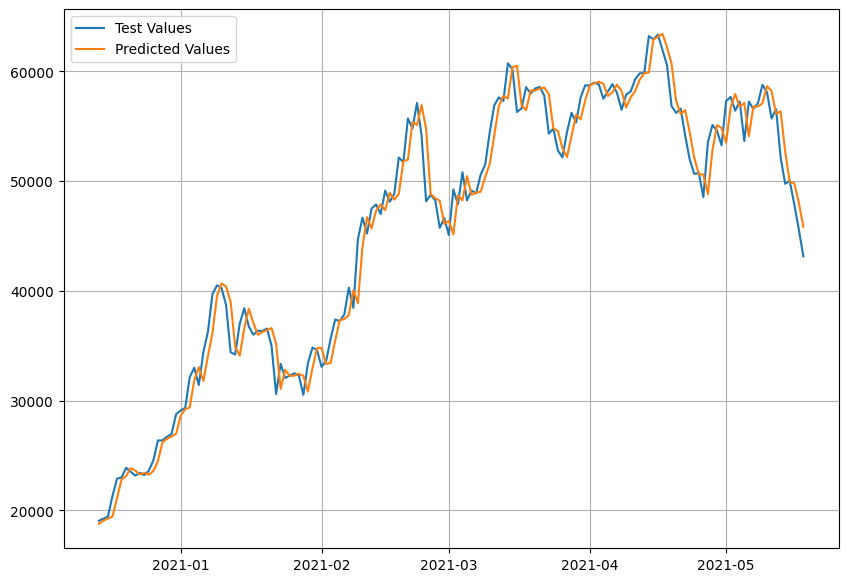

In [ ]:
plt.figure(figsize=(10,7))
plot_ts(X_test[-len(test_windows):],test_labels,400,format='-',labels='Test Values')
plot_ts(X_test[-len(test_windows):],model_5_preds,400,format='-',labels='Predicted Values')

##Model 6 - LSTM
- window 7, horizon 1

In [ ]:
model6 = tf.keras.Sequential([
    expanding_layer,
    layers.LSTM(128,activation='relu'),
    layers.Dense(HORIZON)
],name="model6")

#Compile
model6.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())
#Fit
model6.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=checkpoint(model6.name))


Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2712.4431
Epoch 1: val_loss improved from inf to 11138.96191, saving model to experiments/model6


18/18 [==============================] - 5s 124ms/step - loss: 2676.6033 - val_loss: 11138.9619
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 984.5455 
Epoch 2: val_loss improved from 11138.96191 to 1798.62146, saving model to experiments/model6


18/18 [==============================] - 2s 101ms/step - loss: 743.1832 - val_loss: 1798.6215
Epoch 3/100
10/18 [===============>..............] - ETA: 0s - loss: 238.4775
Epoch 3: val_loss improved from 1798.62146 to 1066.37732, saving model to experiments/model6


18/18 [==============================] - 2s 101ms/step - loss: 220.0714 - val_loss: 1066.3773
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 188.2428
Epoch 4: val_loss did not improve from 1066.37732
18/18 [==============================] - 0s 7ms/step - loss: 181.0627 - val_loss: 1128.5911
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 191.5330
Epoch 5: val_loss improved from 1066.37732 to 1053.82300, saving model to experiments/model6


18/18 [==============================] - 2s 122ms/step - loss: 184.4235 - val_loss: 1053.8230
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 174.4282
Epoch 6: val_loss improved from 1053.82300 to 952.27191, saving model to experiments/model6


18/18 [==============================] - 2s 100ms/step - loss: 181.3639 - val_loss: 952.2719
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 150.8594
Epoch 7: val_loss did not improve from 952.27191
18/18 [==============================] - 0s 8ms/step - loss: 171.2082 - val_loss: 1160.0941
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 193.2060
Epoch 8: val_loss did not improve from 952.27191
18/18 [==============================] - 0s 8ms/step - loss: 187.8365 - val_loss: 1125.8093
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 180.3359
Epoch 9: val_loss did not improve from 952.27191
18/18 [==============================] - 0s 9ms/step - loss: 180.3359 - val_loss: 1011.1047
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 169.2192
Epoch 10: val_loss did not improve from 952.27191
18/18 [==============================] - 0s 7ms/step - loss: 176.7857 - val_loss: 1034.0184
Epoch 11/100
 9/18 [=========

18/18 [==============================] - 2s 119ms/step - loss: 166.0311 - val_loss: 934.5699
Epoch 16/100
10/18 [===============>..............] - ETA: 0s - loss: 168.2550
Epoch 16: val_loss improved from 934.56995 to 928.14862, saving model to experiments/model6


18/18 [==============================] - 2s 98ms/step - loss: 164.0991 - val_loss: 928.1486
Epoch 17/100
12/18 [===================>..........] - ETA: 0s - loss: 154.4548
Epoch 17: val_loss improved from 928.14862 to 910.64264, saving model to experiments/model6


18/18 [==============================] - 2s 100ms/step - loss: 162.2872 - val_loss: 910.6426
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 160.2861
Epoch 18: val_loss improved from 910.64264 to 898.47827, saving model to experiments/model6


18/18 [==============================] - 2s 127ms/step - loss: 160.5708 - val_loss: 898.4783
Epoch 19/100
11/18 [=================>............] - ETA: 0s - loss: 162.2429
Epoch 19: val_loss improved from 898.47827 to 876.41864, saving model to experiments/model6


18/18 [==============================] - 2s 100ms/step - loss: 159.1087 - val_loss: 876.4186
Epoch 20/100
10/18 [===============>..............] - ETA: 0s - loss: 158.2810
Epoch 20: val_loss improved from 876.41864 to 874.86462, saving model to experiments/model6


18/18 [==============================] - 2s 102ms/step - loss: 154.3724 - val_loss: 874.8646
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 148.9944
Epoch 21: val_loss improved from 874.86462 to 863.88519, saving model to experiments/model6


18/18 [==============================] - 2s 122ms/step - loss: 153.1887 - val_loss: 863.8852
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 158.7863
Epoch 22: val_loss improved from 863.88519 to 842.64679, saving model to experiments/model6


18/18 [==============================] - 2s 124ms/step - loss: 154.9426 - val_loss: 842.6468
Epoch 23/100
11/18 [=================>............] - ETA: 0s - loss: 147.3093
Epoch 23: val_loss improved from 842.64679 to 840.04834, saving model to experiments/model6


18/18 [==============================] - 2s 100ms/step - loss: 150.7142 - val_loss: 840.0483
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 150.9723
Epoch 24: val_loss did not improve from 840.04834
18/18 [==============================] - 0s 9ms/step - loss: 147.7773 - val_loss: 885.9223
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 151.7901
Epoch 25: val_loss improved from 840.04834 to 802.66089, saving model to experiments/model6


18/18 [==============================] - 2s 99ms/step - loss: 148.2679 - val_loss: 802.6609
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 145.6004
Epoch 26: val_loss did not improve from 802.66089
18/18 [==============================] - 0s 7ms/step - loss: 145.5435 - val_loss: 826.6196
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 141.3612
Epoch 27: val_loss did not improve from 802.66089
18/18 [==============================] - 0s 8ms/step - loss: 143.3206 - val_loss: 886.2161
Epoch 28/100
 9/18 [==============>...............] - ETA: 0s - loss: 144.4612
Epoch 28: val_loss improved from 802.66089 to 772.05334, saving model to experiments/model6


18/18 [==============================] - 2s 96ms/step - loss: 141.2206 - val_loss: 772.0533
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 138.3879
Epoch 29: val_loss did not improve from 772.05334
18/18 [==============================] - 0s 9ms/step - loss: 138.3879 - val_loss: 925.8435
Epoch 30/100
10/18 [===============>..............] - ETA: 0s - loss: 143.8993
Epoch 30: val_loss improved from 772.05334 to 771.36847, saving model to experiments/model6


18/18 [==============================] - 2s 103ms/step - loss: 140.8597 - val_loss: 771.3685
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 138.5454
Epoch 31: val_loss improved from 771.36847 to 754.00513, saving model to experiments/model6


18/18 [==============================] - 2s 144ms/step - loss: 137.6479 - val_loss: 754.0051
Epoch 32/100
10/18 [===============>..............] - ETA: 0s - loss: 124.0668
Epoch 32: val_loss improved from 754.00513 to 751.29407, saving model to experiments/model6


18/18 [==============================] - 2s 96ms/step - loss: 133.9456 - val_loss: 751.2941
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 129.4791
Epoch 33: val_loss improved from 751.29407 to 742.98859, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 134.5527 - val_loss: 742.9886
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 136.2250
Epoch 34: val_loss improved from 742.98859 to 725.67627, saving model to experiments/model6


18/18 [==============================] - 2s 95ms/step - loss: 135.7589 - val_loss: 725.6763
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 136.4869
Epoch 35: val_loss did not improve from 725.67627
18/18 [==============================] - 0s 8ms/step - loss: 136.3585 - val_loss: 786.4438
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 126.0310
Epoch 36: val_loss improved from 725.67627 to 709.74829, saving model to experiments/model6


18/18 [==============================] - 2s 123ms/step - loss: 130.8082 - val_loss: 709.7483
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 132.5039
Epoch 37: val_loss improved from 709.74829 to 709.58459, saving model to experiments/model6


18/18 [==============================] - 2s 104ms/step - loss: 128.7993 - val_loss: 709.5846
Epoch 38/100
13/18 [====================>.........] - ETA: 0s - loss: 131.3712
Epoch 38: val_loss improved from 709.58459 to 701.34863, saving model to experiments/model6


18/18 [==============================] - 2s 119ms/step - loss: 131.1450 - val_loss: 701.3486
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 124.8961
Epoch 39: val_loss did not improve from 701.34863
18/18 [==============================] - 0s 8ms/step - loss: 126.2892 - val_loss: 735.6602
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 140.1546
Epoch 40: val_loss did not improve from 701.34863
18/18 [==============================] - 0s 7ms/step - loss: 134.0896 - val_loss: 726.9610
Epoch 41/100
 9/18 [==============>...............] - ETA: 0s - loss: 140.8879
Epoch 41: val_loss improved from 701.34863 to 692.32678, saving model to experiments/model6


18/18 [==============================] - 2s 99ms/step - loss: 127.8003 - val_loss: 692.3268
Epoch 42/100
10/18 [===============>..............] - ETA: 0s - loss: 129.8396
Epoch 42: val_loss improved from 692.32678 to 687.31134, saving model to experiments/model6


18/18 [==============================] - 2s 96ms/step - loss: 124.8395 - val_loss: 687.3113
Epoch 43/100
12/18 [===================>..........] - ETA: 0s - loss: 121.7494
Epoch 43: val_loss improved from 687.31134 to 669.81683, saving model to experiments/model6


18/18 [==============================] - 2s 123ms/step - loss: 123.4240 - val_loss: 669.8168
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 121.7994
Epoch 44: val_loss did not improve from 669.81683
18/18 [==============================] - 0s 7ms/step - loss: 124.1968 - val_loss: 679.5857
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 120.3414
Epoch 45: val_loss did not improve from 669.81683
18/18 [==============================] - 0s 7ms/step - loss: 122.3624 - val_loss: 696.1442
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 120.4958
Epoch 46: val_loss improved from 669.81683 to 665.35809, saving model to experiments/model6


18/18 [==============================] - 2s 99ms/step - loss: 123.9141 - val_loss: 665.3581
Epoch 47/100
10/18 [===============>..............] - ETA: 0s - loss: 120.7539
Epoch 47: val_loss improved from 665.35809 to 651.34949, saving model to experiments/model6


18/18 [==============================] - 2s 106ms/step - loss: 121.1429 - val_loss: 651.3495
Epoch 48/100
14/18 [======================>.......] - ETA: 0s - loss: 123.9480
Epoch 48: val_loss did not improve from 651.34949
18/18 [==============================] - 0s 12ms/step - loss: 122.6930 - val_loss: 720.2909
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 120.6169
Epoch 49: val_loss did not improve from 651.34949
18/18 [==============================] - 0s 13ms/step - loss: 120.6169 - val_loss: 679.7340
Epoch 50/100
18/18 [==============================] - ETA: 0s - loss: 121.1496
Epoch 50: val_loss did not improve from 651.34949
18/18 [==============================] - 0s 13ms/step - loss: 121.1496 - val_loss: 651.7243
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 119.0161
Epoch 51: val_loss improved from 651.34949 to 647.36151, saving model to experiments/model6


18/18 [==============================] - 2s 107ms/step - loss: 119.2390 - val_loss: 647.3615
Epoch 52/100
11/18 [=================>............] - ETA: 0s - loss: 122.9950
Epoch 52: val_loss improved from 647.36151 to 641.43976, saving model to experiments/model6


18/18 [==============================] - 2s 121ms/step - loss: 117.3164 - val_loss: 641.4398
Epoch 53/100
11/18 [=================>............] - ETA: 0s - loss: 117.6241
Epoch 53: val_loss improved from 641.43976 to 631.80072, saving model to experiments/model6


18/18 [==============================] - 2s 101ms/step - loss: 119.9185 - val_loss: 631.8007
Epoch 54/100
 9/18 [==============>...............] - ETA: 0s - loss: 126.8521
Epoch 54: val_loss improved from 631.80072 to 629.16711, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 122.2154 - val_loss: 629.1671
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 123.4290
Epoch 55: val_loss improved from 629.16711 to 626.55804, saving model to experiments/model6


18/18 [==============================] - 2s 94ms/step - loss: 115.7255 - val_loss: 626.5580
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 121.3907
Epoch 56: val_loss improved from 626.55804 to 624.65332, saving model to experiments/model6


18/18 [==============================] - 2s 105ms/step - loss: 117.6614 - val_loss: 624.6533
Epoch 57/100
18/18 [==============================] - ETA: 0s - loss: 116.0882
Epoch 57: val_loss did not improve from 624.65332
18/18 [==============================] - 0s 13ms/step - loss: 116.0882 - val_loss: 688.5125
Epoch 58/100
13/18 [====================>.........] - ETA: 0s - loss: 114.3111
Epoch 58: val_loss did not improve from 624.65332
18/18 [==============================] - 0s 12ms/step - loss: 117.1987 - val_loss: 654.0366
Epoch 59/100
18/18 [==============================] - ETA: 0s - loss: 114.7803
Epoch 59: val_loss did not improve from 624.65332
18/18 [==============================] - 0s 13ms/step - loss: 114.7803 - val_loss: 647.8661
Epoch 60/100
18/18 [==============================] - ETA: 0s - loss: 115.9423
Epoch 60: val_loss improved from 624.65332 to 623.62689, saving model to experiments/model6


18/18 [==============================] - 2s 133ms/step - loss: 115.9423 - val_loss: 623.6269
Epoch 61/100
11/18 [=================>............] - ETA: 0s - loss: 120.0488
Epoch 61: val_loss did not improve from 623.62689
18/18 [==============================] - 0s 7ms/step - loss: 116.1332 - val_loss: 641.5754
Epoch 62/100
11/18 [=================>............] - ETA: 0s - loss: 115.0059
Epoch 62: val_loss improved from 623.62689 to 623.42426, saving model to experiments/model6


18/18 [==============================] - 2s 100ms/step - loss: 115.4164 - val_loss: 623.4243
Epoch 63/100
11/18 [=================>............] - ETA: 0s - loss: 120.6093
Epoch 63: val_loss improved from 623.42426 to 609.23358, saving model to experiments/model6


18/18 [==============================] - 2s 98ms/step - loss: 114.3626 - val_loss: 609.2336
Epoch 64/100
11/18 [=================>............] - ETA: 0s - loss: 111.3864
Epoch 64: val_loss improved from 609.23358 to 607.30688, saving model to experiments/model6


18/18 [==============================] - 2s 96ms/step - loss: 113.6640 - val_loss: 607.3069
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 111.1825
Epoch 65: val_loss did not improve from 607.30688
18/18 [==============================] - 0s 7ms/step - loss: 112.7271 - val_loss: 621.0680
Epoch 66/100
14/18 [======================>.......] - ETA: 0s - loss: 113.5796
Epoch 66: val_loss did not improve from 607.30688
18/18 [==============================] - 0s 11ms/step - loss: 116.7166 - val_loss: 704.3055
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 114.6264
Epoch 67: val_loss did not improve from 607.30688
18/18 [==============================] - 0s 14ms/step - loss: 116.6319 - val_loss: 610.9239
Epoch 68/100
18/18 [==============================] - ETA: 0s - loss: 112.0218
Epoch 68: val_loss did not improve from 607.30688
18/18 [==============================] - 0s 13ms/step - loss: 112.0218 - val_loss: 611.1224
Epoch 69/100
18/18 [=====

18/18 [==============================] - 2s 140ms/step - loss: 112.0397 - val_loss: 597.5253
Epoch 71/100
13/18 [====================>.........] - ETA: 0s - loss: 113.7975
Epoch 71: val_loss improved from 597.52527 to 596.27698, saving model to experiments/model6


18/18 [==============================] - 2s 115ms/step - loss: 111.9502 - val_loss: 596.2770
Epoch 72/100
11/18 [=================>............] - ETA: 0s - loss: 108.9300
Epoch 72: val_loss did not improve from 596.27698
18/18 [==============================] - 0s 8ms/step - loss: 113.9787 - val_loss: 608.6993
Epoch 73/100
10/18 [===============>..............] - ETA: 0s - loss: 115.0026
Epoch 73: val_loss did not improve from 596.27698
18/18 [==============================] - 0s 7ms/step - loss: 115.0328 - val_loss: 601.5339
Epoch 74/100
12/18 [===================>..........] - ETA: 0s - loss: 112.6854
Epoch 74: val_loss did not improve from 596.27698
18/18 [==============================] - 0s 8ms/step - loss: 112.4238 - val_loss: 645.6138
Epoch 75/100
10/18 [===============>..............] - ETA: 0s - loss: 109.6608
Epoch 75: val_loss improved from 596.27698 to 591.21594, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 112.4678 - val_loss: 591.2159
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 112.2542
Epoch 76: val_loss did not improve from 591.21594
18/18 [==============================] - 0s 7ms/step - loss: 110.5829 - val_loss: 593.8880
Epoch 77/100
11/18 [=================>............] - ETA: 0s - loss: 107.5874
Epoch 77: val_loss improved from 591.21594 to 588.72693, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 111.5426 - val_loss: 588.7269
Epoch 78/100
11/18 [=================>............] - ETA: 0s - loss: 109.1386
Epoch 78: val_loss did not improve from 588.72693
18/18 [==============================] - 0s 8ms/step - loss: 109.8356 - val_loss: 632.5031
Epoch 79/100
 9/18 [==============>...............] - ETA: 0s - loss: 113.2072
Epoch 79: val_loss did not improve from 588.72693
18/18 [==============================] - 0s 9ms/step - loss: 118.2056 - val_loss: 649.0966
Epoch 80/100
12/18 [===================>..........] - ETA: 0s - loss: 116.7715
Epoch 80: val_loss did not improve from 588.72693
18/18 [==============================] - 0s 8ms/step - loss: 114.2566 - val_loss: 601.2607
Epoch 81/100
11/18 [=================>............] - ETA: 0s - loss: 105.2085
Epoch 81: val_loss did not improve from 588.72693
18/18 [==============================] - 0s 8ms/step - loss: 111.5497 - val_loss: 692.1967
Epoch 82/100
11/18 [========

18/18 [==============================] - 2s 98ms/step - loss: 110.9092 - val_loss: 588.5646
Epoch 85/100
 9/18 [==============>...............] - ETA: 0s - loss: 110.0573
Epoch 85: val_loss did not improve from 588.56464
18/18 [==============================] - 0s 8ms/step - loss: 113.0300 - val_loss: 612.3590
Epoch 86/100
12/18 [===================>..........] - ETA: 0s - loss: 111.4079
Epoch 86: val_loss did not improve from 588.56464
18/18 [==============================] - 0s 7ms/step - loss: 111.9297 - val_loss: 593.8382
Epoch 87/100
10/18 [===============>..............] - ETA: 0s - loss: 110.2127
Epoch 87: val_loss did not improve from 588.56464
18/18 [==============================] - 0s 8ms/step - loss: 109.3177 - val_loss: 605.3240
Epoch 88/100
10/18 [===============>..............] - ETA: 0s - loss: 119.4191
Epoch 88: val_loss did not improve from 588.56464
18/18 [==============================] - 0s 7ms/step - loss: 114.0756 - val_loss: 598.2791
Epoch 89/100
11/18 [========

18/18 [==============================] - 3s 150ms/step - loss: 109.5933 - val_loss: 587.4416
Epoch 95/100
16/18 [=========================>....] - ETA: 0s - loss: 110.9369
Epoch 95: val_loss improved from 587.44159 to 579.83148, saving model to experiments/model6


18/18 [==============================] - 2s 103ms/step - loss: 108.6746 - val_loss: 579.8315
Epoch 96/100
12/18 [===================>..........] - ETA: 0s - loss: 101.3600
Epoch 96: val_loss did not improve from 579.83148
18/18 [==============================] - 0s 7ms/step - loss: 108.8002 - val_loss: 587.9996
Epoch 97/100
11/18 [=================>............] - ETA: 0s - loss: 114.9572
Epoch 97: val_loss did not improve from 579.83148
18/18 [==============================] - 0s 8ms/step - loss: 111.2285 - val_loss: 649.0266
Epoch 98/100
11/18 [=================>............] - ETA: 0s - loss: 104.8263
Epoch 98: val_loss did not improve from 579.83148
18/18 [==============================] - 0s 8ms/step - loss: 109.0359 - val_loss: 635.6935
Epoch 99/100
11/18 [=================>............] - ETA: 0s - loss: 112.0594
Epoch 99: val_loss did not improve from 579.83148
18/18 [==============================] - 0s 8ms/step - loss: 115.3608 - val_loss: 647.4231
Epoch 100/100
10/18 [======

In [ ]:
model6_best = tf.keras.models.load_model("/content/experiments/model6")
model6_best.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 579.8317


579.8316650390625

In [ ]:
model6_preds = model6_best.predict(test_windows)
model6_preds[:3]

18/18 [==============================] - 0s 2ms/step


array([[8894.043],
       [8793.264],
       [8970.962]], dtype=float32)

In [ ]:
model_6_results = error_dict(np.squeeze(test_labels),
                             np.squeeze(model6_preds))
model_6_results,model_5_results

({'MAE': 579.8316170010148,
  'MSE': 1202376.1016172303,
  'RMSE': 1096.5291157179686,
  'MASE': 1.0186034460761557,
  'MAPE': 2.5994594},
 {'MAE': 562.4514335102328,
  'MSE': 1150361.1169086965,
  'RMSE': 1072.5488878874924,
  'MASE': 0.9880712807404467,
  'MAPE': 2.5032036})

##Combining bitcoing prices with halxing events

In [40]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [41]:
block1 = 50 #3January 2009
block2 = 25 #8 November 2012
block3 = 12.5 #9 July 2016
block4 = 6.25 #18 May 2020

block2_date = np.datetime64("2012-11-08")
block3_date = np.datetime64('2016-07-09')
block4_date = np.datetime64('2020-05-18')
#Fill data with blocks - block2 for 2012-2016 / block3 for 2016-2020 etc...

In [42]:
#Calculate days to make ranges
days_2_block3 = (block3_date - bitcoin_prices.index[0]).days
days_2_block4 = (block4_date - bitcoin_prices.index[0]).days
days_2_block3, days_2_block4

(1012, 2421)

In [43]:
bitcoin_p_b = bitcoin_prices.copy()
bitcoin_p_b["block_val"] = None
bitcoin_p_b.head()

,Price,block_val
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [44]:
bitcoin_p_b["block_val"][:days_2_block3] = block2
bitcoin_p_b.head()

<ipython-input-44-3cf2bb0540bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_p_b["block_val"][:days_2_block3] = block2


,Price,block_val
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [45]:
bitcoin_p_b["block_val"][days_2_block3:days_2_block4] = block3
bitcoin_p_b["block_val"][days_2_block4:] = block4
bitcoin_p_b.tail()

<ipython-input-45-ba3036fba83b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_p_b["block_val"][days_2_block3:days_2_block4] = block3
<ipython-input-45-ba3036fba83b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_p_b["block_val"][days_2_block4:] = block4


,Price,block_val
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [46]:
bitcoin_p_b["block_val"].isnull().sum(), bitcoin_p_b["block_val"].unique()

(0, array([25, 12.5, 6.25], dtype=object))

<Axes: xlabel='Date'>

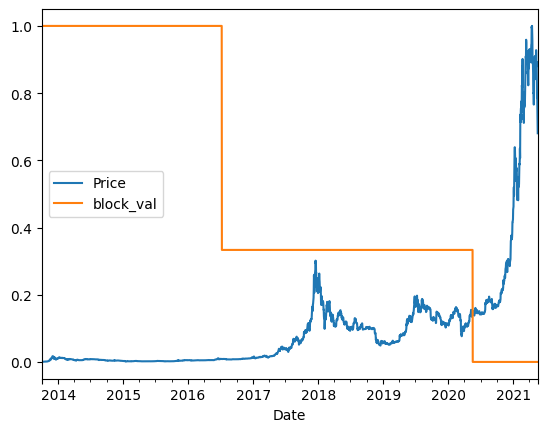

In [47]:
#Visualize blocks vs price
from sklearn.preprocessing import minmax_scale
scaled_df = pd.DataFrame(minmax_scale(bitcoin_p_b[["Price","block_val"]]),
                         columns = bitcoin_p_b.columns,
                         index = bitcoin_p_b.index)
scaled_df.plot()

It can be some negative correlation between blocks and reward

##Make windows from multivariate dataset / before was univareiate where from dim=1 -> dim=2

In [79]:
bitcoin_p_b.head()

,Price,block_val
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [48]:
WINDOW=7
HORIZON=1
windowed_bitcoin = bitcoin_p_b.copy()
for i in range(WINDOW):
  windowed_bitcoin[f"Price+{i+1}"]=windowed_bitcoin["Price"].shift(periods=i+1)
windowed_bitcoin.head(10)

,Price,block_val,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [49]:
windowed_bitcoin= windowed_bitcoin.dropna()
windowed_bitcoin.head(7)

,Price,block_val,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,25,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,25,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,25,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866
2013-10-13,126.38333,25,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533
2013-10-14,135.24199,25,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500


In [ ]:
X = windowed_bitcoin.drop("Price",axis=1).astype('float32')
y= windowed_bitcoin["Price"]
X,y

(            block_val       Price+1       Price+2       Price+3       Price+4  \
 Date                                                                            
 2013-10-08      25.00    121.794998    120.655327    121.338661    118.674660   
 2013-10-09      25.00    123.032997    121.794998    120.655327    121.338661   
 2013-10-10      25.00    124.049004    123.032997    121.794998    120.655327   
 2013-10-11      25.00    125.961159    124.049004    123.032997    121.794998   
 2013-10-12      25.00    125.279663    125.961159    124.049004    123.032997   
 ...               ...           ...           ...           ...           ...   
 2021-05-14       6.25  52147.820312  56573.554688  55715.546875  58102.191406   
 2021-05-15       6.25  49764.132812  52147.820312  56573.554688  55715.546875   
 2021-05-16       6.25  50032.691406  49764.132812  52147.820312  56573.554688   
 2021-05-17       6.25  47885.625000  50032.691406  49764.132812  52147.820312   
 2021-05-18     

In [ ]:
train_windows, train_labels,test_windows, test_labels = train_test_split(X,y,0.2)

In [ ]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
train_windows[:1], train_labels[:1]

(            block_val     Price+1     Price+2     Price+3    Price+4  \
 Date                                                                   
 2013-10-08       25.0  121.794998  120.655327  121.338661  118.67466   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  ,
 Date
 2013-10-08    123.033
 Name: Price, dtype: float64)

##Model 7 - Multivariate model - Dense





In [ ]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(HORIZON)
],name="model7")

#Compile
model7.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())
#Fit 
history7=model7.fit(train_windows,
                    train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_data=(test_windows,test_labels),
                    callbacks=[checkpoint(model7.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 13s - loss: 3200.8633
Epoch 1: val_loss improved from inf to 1992.92651, saving model to experiments/model7


18/18 [==============================] - 1s 34ms/step - loss: 1662.5741 - val_loss: 1992.9265
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 308.4581
Epoch 2: val_loss improved from 1992.92651 to 1776.26636, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 345.0547 - val_loss: 1776.2664
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 205.8388
Epoch 3: val_loss improved from 1776.26636 to 1149.20081, saving model to experiments/model7


18/18 [==============================] - 0s 28ms/step - loss: 207.7195 - val_loss: 1149.2008
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 164.6266
Epoch 4: val_loss improved from 1149.20081 to 1132.35876, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 178.8635 - val_loss: 1132.3588
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 170.9427
Epoch 5: val_loss improved from 1132.35876 to 935.47430, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 170.3421 - val_loss: 935.4743
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 166.6523
Epoch 6: val_loss improved from 935.47430 to 901.27527, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 165.0963 - val_loss: 901.2753
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 134.2045
Epoch 7: val_loss improved from 901.27527 to 890.60571, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 160.1111 - val_loss: 890.6057
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 155.5064
Epoch 8: val_loss did not improve from 890.60571
18/18 [==============================] - 0s 6ms/step - loss: 156.2082 - val_loss: 1008.2054
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 197.8777
Epoch 9: val_loss improved from 890.60571 to 843.43323, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 157.9641 - val_loss: 843.4332
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 146.3865
Epoch 10: val_loss improved from 843.43323 to 816.38940, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 148.0264 - val_loss: 816.3894
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 144.0161
Epoch 11: val_loss improved from 816.38940 to 815.05072, saving model to experiments/model7


18/18 [==============================] - 0s 28ms/step - loss: 145.3669 - val_loss: 815.0507
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 150.4844
Epoch 12: val_loss improved from 815.05072 to 780.57068, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 140.7058 - val_loss: 780.5707
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 124.8775
Epoch 13: val_loss improved from 780.57068 to 741.70459, saving model to experiments/model7


18/18 [==============================] - 0s 28ms/step - loss: 136.8678 - val_loss: 741.7046
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 114.7738
Epoch 14: val_loss improved from 741.70459 to 724.07977, saving model to experiments/model7


18/18 [==============================] - 1s 34ms/step - loss: 132.1197 - val_loss: 724.0798
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 128.1384
Epoch 15: val_loss improved from 724.07977 to 709.57330, saving model to experiments/model7


18/18 [==============================] - 1s 39ms/step - loss: 130.7616 - val_loss: 709.5733
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 137.5553
Epoch 16: val_loss did not improve from 709.57330
18/18 [==============================] - 0s 7ms/step - loss: 135.6898 - val_loss: 727.1815
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 127.8596
Epoch 17: val_loss improved from 709.57330 to 701.12964, saving model to experiments/model7


18/18 [==============================] - 1s 55ms/step - loss: 126.6992 - val_loss: 701.1296
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 114.9294
Epoch 18: val_loss improved from 701.12964 to 676.29230, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 123.5368 - val_loss: 676.2923
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 117.7322
Epoch 19: val_loss did not improve from 676.29230
18/18 [==============================] - 0s 5ms/step - loss: 127.2032 - val_loss: 677.4885
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 136.9996
Epoch 20: val_loss improved from 676.29230 to 662.72772, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 121.8572 - val_loss: 662.7277
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 170.7782
Epoch 21: val_loss improved from 662.72772 to 655.41174, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 120.9569 - val_loss: 655.4117
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8503
Epoch 22: val_loss improved from 655.41174 to 646.50720, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 119.8799 - val_loss: 646.5072
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 128.5702
Epoch 23: val_loss improved from 646.50720 to 646.48956, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 118.4310 - val_loss: 646.4896
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 86.8667
Epoch 24: val_loss improved from 646.48956 to 633.49286, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 117.1481 - val_loss: 633.4929
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 96.7615
Epoch 25: val_loss improved from 633.49286 to 627.51538, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 117.4591 - val_loss: 627.5154
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 81.0667
Epoch 26: val_loss did not improve from 627.51538
18/18 [==============================] - 0s 5ms/step - loss: 118.0093 - val_loss: 682.4146
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 123.5228
Epoch 27: val_loss did not improve from 627.51538
18/18 [==============================] - 0s 5ms/step - loss: 120.0728 - val_loss: 695.2269
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 139.7695
Epoch 28: val_loss improved from 627.51538 to 621.65027, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 121.6317 - val_loss: 621.6503
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 137.6201
Epoch 29: val_loss improved from 621.65027 to 618.79706, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 115.5332 - val_loss: 618.7971
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 118.4548
Epoch 30: val_loss did not improve from 618.79706
18/18 [==============================] - 0s 4ms/step - loss: 113.2494 - val_loss: 698.5068
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 104.4606
Epoch 31: val_loss improved from 618.79706 to 607.53430, saving model to experiments/model7


18/18 [==============================] - 0s 25ms/step - loss: 122.3314 - val_loss: 607.5343
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 138.1470
Epoch 32: val_loss did not improve from 607.53430
18/18 [==============================] - 0s 4ms/step - loss: 120.1547 - val_loss: 761.6420
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 129.7219
Epoch 33: val_loss did not improve from 607.53430
18/18 [==============================] - 0s 4ms/step - loss: 126.4806 - val_loss: 623.9266
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 101.0259
Epoch 34: val_loss improved from 607.53430 to 602.65210, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 124.8711 - val_loss: 602.6521
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 97.6397
Epoch 35: val_loss did not improve from 602.65210
18/18 [==============================] - 0s 4ms/step - loss: 112.6551 - val_loss: 722.4828
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 122.1085
Epoch 36: val_loss did not improve from 602.65210
18/18 [==============================] - 0s 5ms/step - loss: 122.2221 - val_loss: 607.7300
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 128.0860
Epoch 37: val_loss improved from 602.65210 to 601.53149, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 111.5534 - val_loss: 601.5315
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 106.7952
Epoch 38: val_loss did not improve from 601.53149
18/18 [==============================] - 0s 4ms/step - loss: 111.4223 - val_loss: 615.9940
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 119.7118
Epoch 39: val_loss did not improve from 601.53149
18/18 [==============================] - 0s 5ms/step - loss: 112.7950 - val_loss: 622.5109
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 109.7857
Epoch 40: val_loss improved from 601.53149 to 593.27832, saving model to experiments/model7


18/18 [==============================] - 0s 27ms/step - loss: 110.6416 - val_loss: 593.2783
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 87.2298
Epoch 41: val_loss did not improve from 593.27832
18/18 [==============================] - 0s 5ms/step - loss: 110.4492 - val_loss: 601.5715
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 111.0619
Epoch 42: val_loss did not improve from 593.27832
18/18 [==============================] - 0s 5ms/step - loss: 112.3571 - val_loss: 602.6654
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 128.1180
Epoch 43: val_loss did not improve from 593.27832
18/18 [==============================] - 0s 5ms/step - loss: 117.8257 - val_loss: 661.1511
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 118.9003
Epoch 44: val_loss did not improve from 593.27832
18/18 [==============================] - 0s 4ms/step - loss: 111.4976 - val_loss: 652.6989
Epoch 45/100
 1/18 [>........

18/18 [==============================] - 0s 25ms/step - loss: 115.2133 - val_loss: 586.3879
Epoch 47/100
15/18 [========================>.....] - ETA: 0s - loss: 111.0216
Epoch 47: val_loss did not improve from 586.38794
18/18 [==============================] - 0s 6ms/step - loss: 110.9154 - val_loss: 595.0899
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 118.8377
Epoch 48: val_loss did not improve from 586.38794
18/18 [==============================] - 0s 4ms/step - loss: 110.1817 - val_loss: 611.0649
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 110.1425
Epoch 49: val_loss did not improve from 586.38794
18/18 [==============================] - 0s 6ms/step - loss: 110.0628 - val_loss: 629.3313
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 104.9968
Epoch 50: val_loss did not improve from 586.38794
18/18 [==============================] - 0s 5ms/step - loss: 113.2690 - val_loss: 623.8632
Epoch 51/100
 1/18 [>.......

18/18 [==============================] - 0s 26ms/step - loss: 115.7934 - val_loss: 577.7252
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 98.3876
Epoch 55: val_loss did not improve from 577.72522
18/18 [==============================] - 0s 4ms/step - loss: 112.1146 - val_loss: 636.9868
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 79.4723
Epoch 56: val_loss improved from 577.72522 to 575.93213, saving model to experiments/model7


18/18 [==============================] - 0s 25ms/step - loss: 115.0713 - val_loss: 575.9321
Epoch 57/100
15/18 [========================>.....] - ETA: 0s - loss: 108.4281
Epoch 57: val_loss did not improve from 575.93213
18/18 [==============================] - 0s 7ms/step - loss: 107.3828 - val_loss: 589.9677
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 111.2016
Epoch 58: val_loss improved from 575.93213 to 575.11792, saving model to experiments/model7


18/18 [==============================] - 1s 38ms/step - loss: 111.9525 - val_loss: 575.1179
Epoch 59/100
15/18 [========================>.....] - ETA: 0s - loss: 106.9897
Epoch 59: val_loss did not improve from 575.11792
18/18 [==============================] - 0s 6ms/step - loss: 108.0568 - val_loss: 644.7610
Epoch 60/100
16/18 [=========================>....] - ETA: 0s - loss: 109.5116
Epoch 60: val_loss did not improve from 575.11792
18/18 [==============================] - 0s 7ms/step - loss: 112.0007 - val_loss: 640.8550
Epoch 61/100
15/18 [========================>.....] - ETA: 0s - loss: 111.5762
Epoch 61: val_loss did not improve from 575.11792
18/18 [==============================] - 0s 7ms/step - loss: 113.6106 - val_loss: 592.9547
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 89.6652
Epoch 62: val_loss improved from 575.11792 to 574.14636, saving model to experiments/model7


18/18 [==============================] - 1s 31ms/step - loss: 112.7074 - val_loss: 574.1464
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 77.3232
Epoch 63: val_loss improved from 574.14636 to 572.24152, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 107.5702 - val_loss: 572.2415
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 82.5463
Epoch 64: val_loss did not improve from 572.24152
18/18 [==============================] - 0s 4ms/step - loss: 111.2226 - val_loss: 582.6495
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 109.6813
Epoch 65: val_loss did not improve from 572.24152
18/18 [==============================] - 0s 5ms/step - loss: 120.8232 - val_loss: 621.6341
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 95.2788
Epoch 66: val_loss did not improve from 572.24152
18/18 [==============================] - 0s 4ms/step - loss: 112.4037 - val_loss: 573.1047
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 106.1312
Epoch 67: val_loss improved from 572.24152 to 571.34100, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 107.8253 - val_loss: 571.3410
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 120.2567
Epoch 68: val_loss did not improve from 571.34100
18/18 [==============================] - 0s 5ms/step - loss: 107.2396 - val_loss: 572.3129
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 116.4387
Epoch 69: val_loss did not improve from 571.34100
18/18 [==============================] - 0s 4ms/step - loss: 107.8635 - val_loss: 573.1432
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 116.5084
Epoch 70: val_loss did not improve from 571.34100
18/18 [==============================] - 0s 5ms/step - loss: 106.9221 - val_loss: 572.1966
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 88.2085
Epoch 71: val_loss did not improve from 571.34100
18/18 [==============================] - 0s 4ms/step - loss: 107.1859 - val_loss: 578.6239
Epoch 72/100
 1/18 [>........

18/18 [==============================] - 0s 27ms/step - loss: 107.2033 - val_loss: 571.0055
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 111.2309
Epoch 76: val_loss did not improve from 571.00549
18/18 [==============================] - 0s 5ms/step - loss: 107.3772 - val_loss: 572.8920
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 141.5366
Epoch 77: val_loss did not improve from 571.00549
18/18 [==============================] - 0s 5ms/step - loss: 109.0550 - val_loss: 645.6597
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 120.1635
Epoch 78: val_loss improved from 571.00549 to 567.90997, saving model to experiments/model7


18/18 [==============================] - 0s 26ms/step - loss: 110.3782 - val_loss: 567.9100
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 102.5074
Epoch 79: val_loss did not improve from 567.90997
18/18 [==============================] - 0s 4ms/step - loss: 110.5801 - val_loss: 620.6255
Epoch 80/100
17/18 [===========================>..] - ETA: 0s - loss: 112.4524
Epoch 80: val_loss did not improve from 567.90997
18/18 [==============================] - 0s 5ms/step - loss: 111.9808 - val_loss: 621.5536
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 118.1225
Epoch 81: val_loss did not improve from 567.90997
18/18 [==============================] - 0s 5ms/step - loss: 108.2459 - val_loss: 608.1614
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 105.3491
Epoch 82: val_loss did not improve from 567.90997
18/18 [==============================] - 0s 4ms/step - loss: 113.6911 - val_loss: 607.0232
Epoch 83/100
 1/18 [>.......

18/18 [==============================] - 1s 49ms/step - loss: 105.6113 - val_loss: 566.2620
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 96.7122
Epoch 99: val_loss did not improve from 566.26202
18/18 [==============================] - 0s 5ms/step - loss: 105.8534 - val_loss: 573.6252
Epoch 100/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4589
Epoch 100: val_loss did not improve from 566.26202
18/18 [==============================] - 0s 5ms/step - loss: 106.6563 - val_loss: 619.6190


<Axes: >

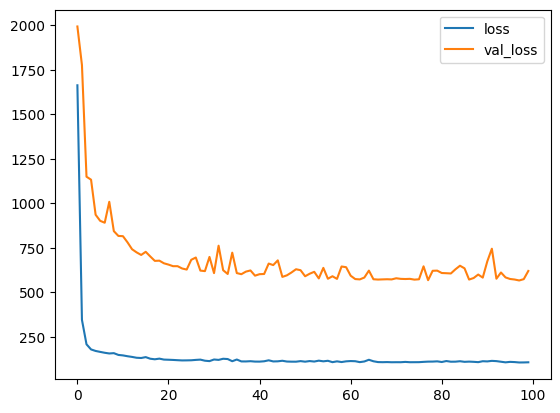

In [ ]:
pd.DataFrame(history7.history).plot()

In [ ]:
model7.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 619.6188


619.6188354492188

In [ ]:
model7_best = tf.keras.models.load_model('/content/experiments/model7')
model7_best.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 566.2621


566.2621459960938

In [ ]:
model7_preds = np.squeeze(model7_best.predict(test_windows))
model7_preds[:5]

18/18 [==============================] - 0s 1ms/step


array([8846.0205, 8760.044 , 9032.761 , 8799.209 , 8714.383 ],
      dtype=float32)

In [ ]:
model7_results = error_dict(test_labels,model7_preds)
model7_results

{'MAE': 566.2621674015525,
 'MSE': 1164150.3756003869,
 'RMSE': 1078.9580045582807,
 'MASE': nan,
 'MAPE': 2.537882}

In [ ]:
train_windows

,block_val,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661
...,...,...,...,...,...,...,...,...
2019-11-05,12.5,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117,9455.724609,9458.223633
2019-11-06,12.5,9369.627930,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117,9455.724609
2019-11-07,12.5,9326.599609,9369.627930,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117


In [ ]:
train_labels

Date
2013-10-08     123.033000
2013-10-09     124.049000
2013-10-10     125.961160
2013-10-11     125.279660
2013-10-12     125.927500
                 ...     
2019-11-05    9369.628081
2019-11-06    9326.599624
2019-11-07    9335.752402
2019-11-08    9226.485821
2019-11-09    8794.358645
Name: Price, Length: 2224, dtype: float64

#Building **N-BEATS** Model
- https://arxiv.org/abs/1905.10437
-Figure 1 - overall structure
-Table 18 - Hyperparameters

`Every Figures are taken from this article`

**Input Block**
- https://www.tensorflow.org/guide/keras/custom_layers_and_models?hl=pl

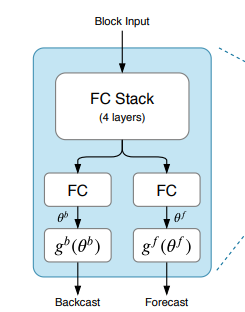
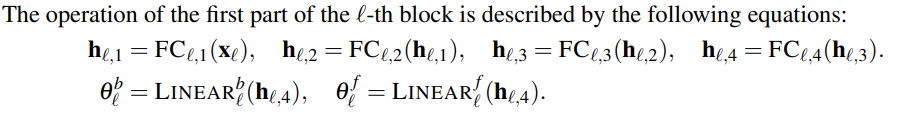

In [ ]:
WINDOW = 7
HORIZON=1
class NBeatsIBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,#Size of window
               theta_size: int,
               n_neurons: int, #hidden units in FC Stack
               n_layers: int, # number of layers in FC Stack
               horizon: int, #Distance into the future to forecast
               **kwargs): #Arguments built in tf.keras.layers.Layer such as input_size,trainable..
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    self.horizon = horizon
    #Making a list of FC layers with ReLu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]

    #Output with theta  layers as shown above and has linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation="linear")

    #Method to transform from inputs to outputs - Functional Method
  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x=layer(x)
    theta = self.theta_layer(x) 
    backcast, forecast = theta[:,:self.input_size],theta[:,-self.horizon:]
    return backcast,forecast

Check if everything works

In [ ]:
#Test nbeasts block
test_nbeats_layer = NBeatsIBlock(input_size=WINDOW,
                           theta_size=WINDOW+HORIZON,
                           n_neurons=512,
                           n_layers=4,
                           horizon=HORIZON)

In [ ]:
#Dense input shape (batch_size,...,input_dim) - Test for NBEATS block
test_input = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
test_input

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
#Test
backcast,forecast = test_nbeats_layer(test_input)
backcast,forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[-0.2875769 , -0.11468185, -0.04030496,  0.37040803, -0.18357044,
          0.2768477 ,  0.0755365 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.20532537]], dtype=float32)>)

##Prepare data for NBeats

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
WINDOW = 7
HORIZON=1
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW):
  bitcoin_prices_nbeats[f"PRICE+{i+1}"] = bitcoin_prices["Price"].shift(periods=i+1)
bitcoin_prices_nbeats = bitcoin_prices_nbeats.dropna()
bitcoin_prices_nbeats.head(7)

,Price,PRICE+1,PRICE+2,PRICE+3,PRICE+4,PRICE+5,PRICE+6,PRICE+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866
2013-10-13,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533
2013-10-14,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500


In [ ]:
X = bitcoin_prices_nbeats.drop("Price",axis=1)
y = bitcoin_prices_nbeats["Price"]
train_windows, train_labels,test_windows, test_labels = train_test_split(X,y,0.2)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
train_windows[:2],train_labels[:2]

(            PRICE+1    PRICE+2    PRICE+3    PRICE+4    PRICE+5    PRICE+6  \
 Date                                                                         
 2013-10-08  121.795  120.65533  121.33866  118.67466  108.58483  125.45500   
 2013-10-09  123.033  121.79500  120.65533  121.33866  118.67466  108.58483   
 
               PRICE+7  
 Date                   
 2013-10-08  123.65499  
 2013-10-09  125.45500  ,
 Date
 2013-10-08    123.033
 2013-10-09    124.049
 Name: Price, dtype: float64)

In [ ]:
#Make tf.data for faster training
train_windows_ds = tf.data.Dataset.from_tensor_slices(train_windows)
train_labels_ds  =tf.data.Dataset.from_tensor_slices(train_labels)

test_windows_ds = tf.data.Dataset.from_tensor_slices(test_windows)
test_labels_ds  =tf.data.Dataset.from_tensor_slices(test_labels)

# Zip windows with labels
train_ds = tf.data.Dataset.zip((train_windows_ds,train_labels_ds))
test_ds = tf.data.Dataset.zip((test_windows_ds,test_labels_ds))

#Make batches, then prefetch - parallel Preprocessing - using
train_ds = train_ds.batch(1024).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(1024).prefetch(tf.data.AUTOTUNE)

train_ds,test_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

Define hyperparameters - Table 18 
- For daily prediction model

In [ ]:
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
EPOCHS = 5000
INPUT_SIZE = WINDOW*HORIZON
THETA_SIZE = WINDOW+HORIZON


Residual connections

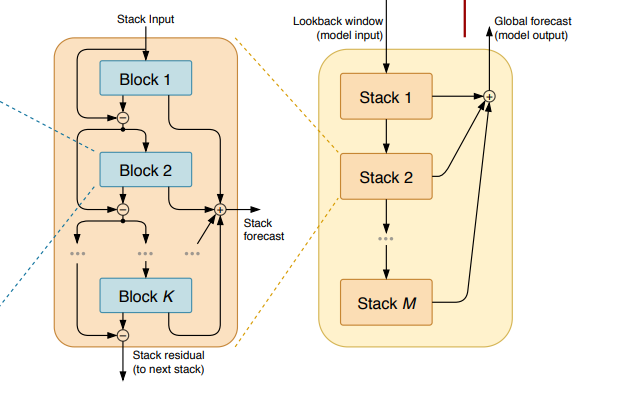

In [ ]:
import tensorflow as tf

In [ ]:
%%time
from tensorflow.keras import layers

#1. Nbeats instance
nbeats_block_layer = NBeatsIBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  horizon=HORIZON,
                                  name="Init_Block")
#2. Input layer
input=tf.keras.layers.Input(shape=(INPUT_SIZE),name="Input_NBEATS")

#3. Initial backcast and forecast  | Residuals are equal to difference between observations and fitted values

residuals, forecast = nbeats_block_layer(input)
residuals = tf.keras.layers.subtract([input,residuals])
#4. Stack of block layers
for i in range(N_STACKS-1): # -1 Because there is initial block already
  #5. Backcast and forecast for rest of the stacks
  backcast,forecast_block =   NBeatsIBlock(input_size=INPUT_SIZE,
                                    theta_size=THETA_SIZE,
                                    n_neurons=N_NEURONS,
                                    n_layers=N_LAYERS,
                                    horizon=HORIZON,
                                    name=f"Block{i}")(residuals)
  #6. Double residual stacking - Add/Substract
  residuals = layers.subtract([residuals,backcast], name=f"substract_{i}")
  forecast = layers.add([forecast,forecast_block],name=f"add_{i}")

#7. Model - connect inputs with outputs
nbeats_model = tf.keras.models.Model(inputs=input,outputs=forecast,name="NBEATS")

#8. Compiling model
nbeats_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

#9. Create callbacks for fitting

history_nbeats = nbeats_model.fit(train_ds,
                                  epochs=EPOCHS,
                                  validation_data=test_ds,
                                  verbose=0,
                                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=200,restore_best_weights=True),
                                             tf.keras.callbacks.ReduceLROnPlateau(patience=100,verbose=1)])


Epoch 227: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 327: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 46s, sys: 2.23 s, total: 1min 48s
Wall time: 2min 8s


In [ ]:
nbeats_model.evaluate(test_ds)

1/1 [==============================] - 0s 29ms/step - loss: 574.7808


574.78076171875

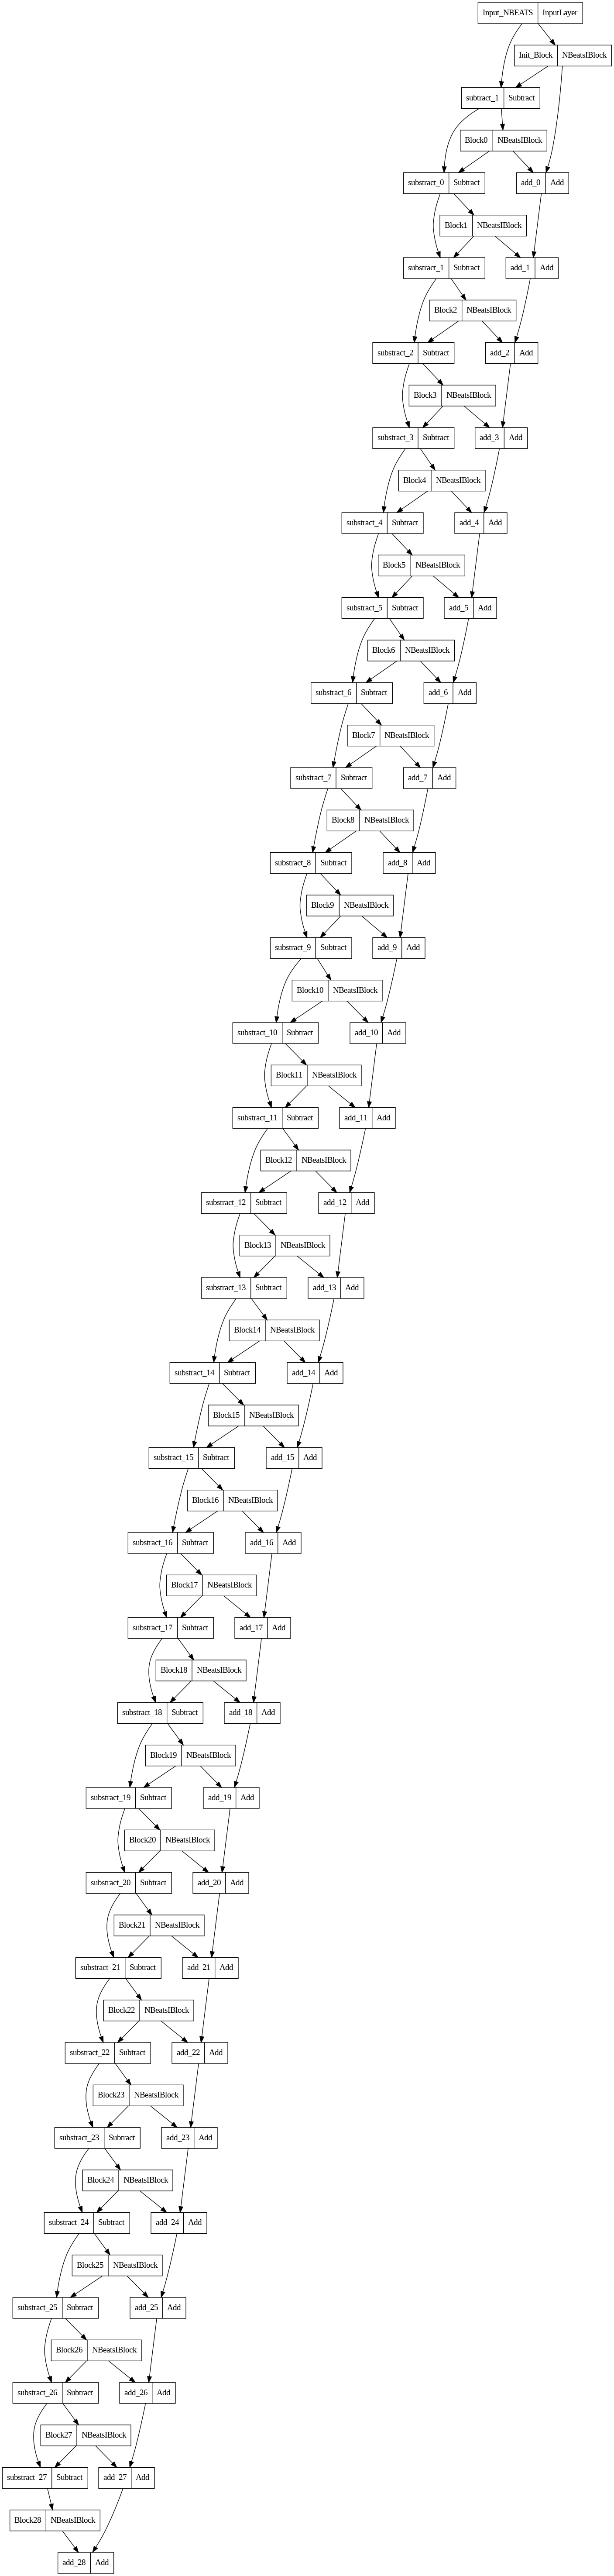

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(nbeats_model)

In [ ]:
nbeats_preds = nbeats_model.predict(test_ds)
nbeats_preds[:5]

1/1 [==============================] - 0s 16ms/step


array([[8890.421],
       [8785.425],
       [8990.281],
       [8759.536],
       [8759.317]], dtype=float32)

In [ ]:
nbeasts_results = error_dict(np.squeeze(test_labels.to_numpy()),np.squeeze(nbeats_preds))
nbeasts_results

{'MAE': 574.7807457901149,
 'MSE': 1176813.8813811361,
 'RMSE': 1084.8105278716353,
 'MASE': 1.0097304652481707,
 'MAPE': 2.5922155}

# Model 8 - Ensemble Model (Combining models by using different loss functions)

In [ ]:
def ensemble_model(train_ds = train_ds,
                   test_ds =test_ds,
                   epochs=1000,
                   iters=5,
                   loss=["mae","mse","mape"],
                   horizon = HORIZON):
  '''
  Bulding model using defined loss functions - mae/mse/mape for diversity
  It is said that it is also better way to regularize than for example Dropout layers
  Iters - number of iterations through 3 models each with different loss function
  '''  
  models=[]
  for i in range(iters):
    for l in loss:
      model = tf.keras.Sequential([
          tf.keras.layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          tf.keras.layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          tf.keras.layers.Dense(horizon)
      ],name=f"model{i}_{l}")
      #Compile model with appropriate loss
      model.compile(loss=l,
                    optimizer=tf.keras.optimizers.Adam())
      #Fit model
      model.fit(train_ds,
                epochs=epochs,
                verbose=0,
                validation_data=test_ds,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=200,restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(patience=100)])
      models.append(model)
  return models

In [ ]:
ensemble_models = ensemble_model()

In [ ]:
ensemble_models

Making predictions on built models

In [ ]:
def ensemble_preds(models,test_data):
  preds = []
  for model in models:
    pred = model.predict(test_data)
    preds.append(pred)
  return tf.constant(preds)

In [ ]:
%%time
ensemble_preds = ensemble_preds(ensemble_models,test_ds)

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 35ms/step
CPU times: user 690 ms, sys: 21.1 ms, total: 712 ms
Wall time: 805 ms


In [ ]:
ensemble_preds 

<tf.Tensor: shape=(15, 556, 1), dtype=float32, numpy=
array([[[ 8855.753],
        [ 8806.423],
        [ 9011.025],
        ...,
        [50163.254],
        [48363.44 ],
        [46685.355]],

       [[ 8801.784],
        [ 8735.71 ],
        [ 8983.476],
        ...,
        [49794.566],
        [48041.516],
        [46588.6  ]],

       [[ 8818.889],
        [ 8803.27 ],
        [ 9045.322],
        ...,
        [49632.99 ],
        [48229.246],
        [45910.88 ]],

       ...,

       [[ 8799.992],
        [ 8828.27 ],
        [ 9102.866],
        ...,
        [50240.223],
        [48525.25 ],
        [45435.258]],

       [[ 8757.478],
        [ 8721.87 ],
        [ 9106.376],
        ...,
        [50486.29 ],
        [48287.57 ],
        [46435.883]],

       [[ 8812.175],
        [ 8731.658],
        [ 9022.916],
        ...,
        [49755.453],
        [48060.76 ],
        [46409.344]]], dtype=float32)>

In [ ]:
mean_ensemble_preds = tf.reduce_mean(ensemble_preds,axis=0)
median_ensemble_preds = np.median(np.squeeze(ensemble_preds),axis=0)
len(mean_ensemble_preds),len(median_ensemble_preds)

(556, 556)

In [ ]:
ensemble_mean_results = error_dict(np.squeeze(test_labels.to_numpy()),
                                   np.squeeze(mean_ensemble_preds))
ensemble_median_results = error_dict(np.squeeze(test_labels.to_numpy()),
                                   median_ensemble_preds)
ensemble_mean_results,ensemble_median_results

({'MAE': 568.4380117589847,
  'MSE': 1146062.79427233,
  'RMSE': 1070.543223915938,
  'MASE': 0.9985880394952086,
  'MAPE': 2.5686717},
 {'MAE': 567.3074953212914,
  'MSE': 1143770.7121230576,
  'RMSE': 1069.4721651932123,
  'MASE': 0.9966020354459019,
  'MAPE': 2.5538325})

## Uncertainty estimations from ensemble model - `with 95 percent prediction interval`


In [ ]:
#Calculate standard deviation
std = tf.math.reduce_std(ensemble_preds,axis=0)
#Using Z-Score - for 95% =1.96 calculate upper and lower band
z = 1.96
u_band = mean_ensemble_preds + z*std
l_band = mean_ensemble_preds - z*std
u_band[:3],l_band[:3]

(<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[8864.474],
        [8853.654],
        [9140.611]], dtype=float32)>,
 <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[8710.267],
        [8689.311],
        [8980.477]], dtype=float32)>)

# Model for future prediction (that means on all historical data its prepared)

Prepare whole data

In [82]:
windowed_bitcoin.head()

,Price,block_val,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,25,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,25,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,25,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [83]:
windows = windowed_bitcoin.drop(["Price","block_val"],axis=1)
labels = windowed_bitcoin["Price"]
windows[:3],labels[:3]

(            Price+1    Price+2    Price+3    Price+4    Price+5    Price+6  \
 Date                                                                         
 2013-10-08  121.795  120.65533  121.33866  118.67466  108.58483  125.45500   
 2013-10-09  123.033  121.79500  120.65533  121.33866  118.67466  108.58483   
 2013-10-10  124.049  123.03300  121.79500  120.65533  121.33866  118.67466   
 
               Price+7  
 Date                   
 2013-10-08  123.65499  
 2013-10-09  125.45500  
 2013-10-10  108.58483  ,
 Date
 2013-10-08    123.03300
 2013-10-09    124.04900
 2013-10-10    125.96116
 Name: Price, dtype: float64)

Use tf.data API

In [84]:
BATCH_SIZE = 1024
windows_ds = tf.data.Dataset.from_tensor_slices(windows)
labels_ds = tf.data.Dataset.from_tensor_slices(labels)
ds = tf.data.Dataset.zip((windows_ds,labels_ds))
ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

Build/Fit Model

In [ ]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(HORIZON)
],name="model_9")

#Compile
model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
#Fit
history_9 = model_9.fit(ds,
            epochs=1000,
            verbose=0,
            callbacks=[tf.keras.callbacks.ModelCheckpoint(monitor="train_loss",
                                                          filepath=model_9.name)])

In [97]:
model9_preds = model_9.predict(ds)
model9_preds[:5],len(model9_preds), tf.expand_dims(tf.squeeze(tf.constant(model9_preds[:7])),axis=0)

3/3 [==============================] - 0s 4ms/step


(array([[122.482834],
        [122.9691  ],
        [125.15629 ],
        [126.57194 ],
        [125.99741 ]], dtype=float32),
 2780,
 <tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[122.482834, 122.9691  , 125.15629 , 126.57194 , 125.99741 ,
         126.54215 , 126.96873 ]], dtype=float32)>)

CREATE FUNCTION TO PREDICT FUTURE

In [116]:
def predict_future(model, days_to_future,window_size,last_predictions):
  future_preds = []
  input_data = last_predictions[-window_size:]
  print(f"Input_Data: {input_data}")
  for i in range(days_to_future):
    pred = model.predict(tf.expand_dims(tf.squeeze(tf.constant(input_data)),axis=0))
    future_preds.append(pred)#Appending new prediction
    #Updating data to predict on 
    input_data = np.append(input_data,pred)
    input_data = np.delete(input_data,0)
    print(f"ID{i}: {input_data}")
    print(f"pred{i}: {pred}")
  return future_preds

In [129]:
future_preds = predict_future(model=model_9,
               days_to_future=14,
               window_size=7,
               last_predictions=model9_preds)

Input_Data: [[56057.605]
 [56317.566]
 [52454.07 ]
 [49484.227]
 [49379.09 ]
 [47679.176]
 [45513.887]]
1/1 [==============================] - 0s 23ms/step
ID0: [56317.566 52454.07  49484.227 49379.09  47679.176 45513.887 56513.91 ]
pred0: [[56513.91]]
1/1 [==============================] - 0s 21ms/step
ID1: [52454.07  49484.227 49379.09  47679.176 45513.887 56513.91  55193.87 ]
pred1: [[55193.87]]
1/1 [==============================] - 0s 19ms/step
ID2: [49484.227 49379.09  47679.176 45513.887 56513.91  55193.87  52011.652]
pred2: [[52011.652]]
1/1 [==============================] - 0s 19ms/step
ID3: [49379.09  47679.176 45513.887 56513.91  55193.87  52011.652 49341.164]
pred3: [[49341.164]]
1/1 [==============================] - 0s 17ms/step
ID4: [47679.176 45513.887 56513.91  55193.87  52011.652 49341.164 48929.72 ]
pred4: [[48929.72]]
1/1 [==============================] - 0s 19ms/step
ID5: [45513.887 56513.91  55193.87  52011.652 49341.164 48929.72  46894.047]
pred5: [[46894.047]]

In [131]:
future_preds= np.squeeze(future_preds)

In [132]:
def future_data(start_date,days_to_future,offset=1):
    sd = start_date + np.timedelta64(offset,"D")
    ed = start_date + np.timedelta64(days_to_future+offset,'D')
    return np.arange(sd,ed,dtype="datetime64[D]")

In [133]:
last_date = bitcoin_prices.index[-1]
next_dates = future_data(last_date,14)
next_dates

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

Plot future predictionss

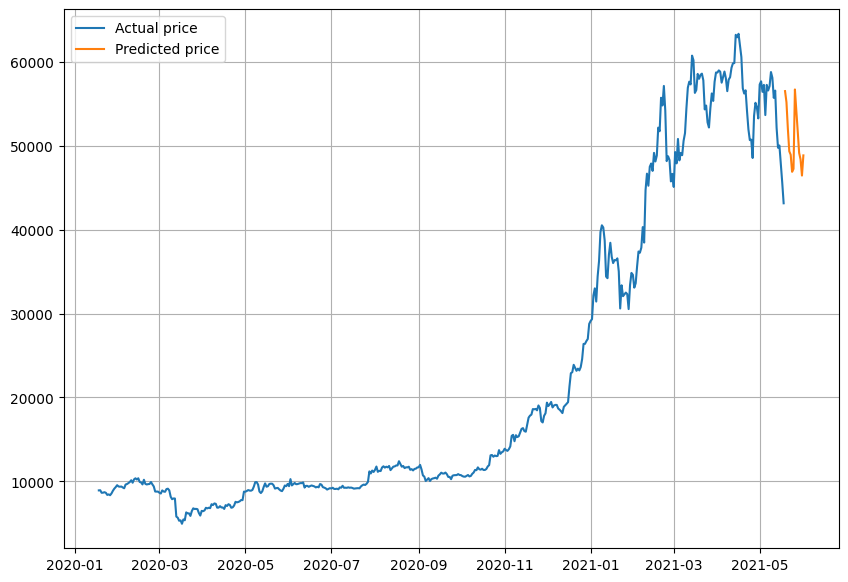

In [138]:
plt.figure(figsize=(10,7))
plot_ts(bitcoin_prices.index,data=bitcoin_prices["Price"],start=2300,format="-",labels="Actual price")
plot_ts(next_dates,data=future_preds,format='-',labels="Predicted price")

# Model 10 - Turkey problem (Model is not prepared for some hude unpredictable anomalies) 

In [52]:
turkey_price = btc_price.copy()
turkey_price[-1] = turkey_price[-1]/100
turkey_price[-1], len(turkey_price)

(431.44471290860304, 2787)

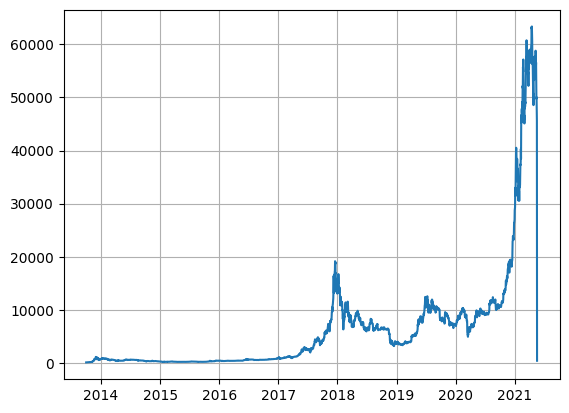

In [61]:
plot_ts(timesteps,turkey_price,format='-')

In [57]:
windows, labels = get_windows(np.asarray(turkey_price),7,1)

In [58]:
#Split to train and test sets
train_windows, train_labels,test_windows, test_labels = train_test_split(windows,labels,0.2)
train_windows[:3],train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116]]))

##Building and fitting a model

In [ ]:
model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
],name="model10")

#Compile the model
model10.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())
#Fit
history10 = model10.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=0,
                        batch_size=128,
                        validation_data=(test_windows,test_labels),
                        callbacks=[tf.keras.callbacks.ModelCheckpoint(model10.name)])

In [76]:
model10.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 20019.5449


20019.544921875

In [78]:
m10 = tf.keras.models.load_model("/content/model10")
m10.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 20019.5449


20019.544921875

In [79]:
preds10 = model10.predict(test_windows)

18/18 [==============================] - 0s 1ms/step


In [73]:
test_windows[-1], test_labels[-1]

(array([55715.54665129, 56573.5554719 , 52147.82118698, 49764.1320816 ,
        50032.69313676, 47885.62525472, 45604.61575361]),
 array([431.44471291]))